# Intro

Description of laboratory (N_HOT + W_HOT) and road (RDE) test CO2 and NOx emissions in function of speed (in bins).
Different COPERT 4 and 5 curves can be plotted to compare our experimental results.
The emissions and the speed will be averaged by fixed distance.

## Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# %%javascript
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }

## Read files

In [3]:
# gasoline (4 vehicles - category small)
gas_lab = r'K:\PERSONNEL\Bernat\For Victor\COPERT_speed\gasoline\LAB\HOT'         # N_HOT & W_HOT - gasoline - 4 gas veh
gas_road = r'K:\PERSONNEL\Bernat\For Victor\COPERT_speed\gasoline\EMROAD'         # RDE (ESP & LAB) - gasoline-4 gas veh
gas_coldhot = r'K:\PERSONNEL\Bernat\For Victor\COPERT_speed\gasoline\coldhot'     # Lab tests COLD vs HOT -    4 gas veh 

# diesel (5 vehicles - category medium - for CO2 comparison with COPERT)
die_lab_co2 = r'K:\PERSONNEL\Bernat\For Victor\COPERT_speed\diesel\LAB\LAB_CO2_med'         # N_HOT & W_HOT - 5 diesel veh
die_road_co2 = r'K:\PERSONNEL\Bernat\For Victor\COPERT_speed\diesel\EMROAD\EMROAD_CO2_med'  # RDE (ESP & LAB)-5 diesel veh

# diesel (7 vehicles - all diesel available except Partner that is LCV - no category distinction)
die_lab_nox = r'K:\PERSONNEL\Bernat\For Victor\COPERT_speed\diesel\LAB\LAB_NOx'            # N_HOT & W_HOT -  7 diesel veh
die_road_nox = r'K:\PERSONNEL\Bernat\For Victor\COPERT_speed\diesel\EMROAD\EMROAD_NOx'     # RDE (ESP & LAB)- 7 diesel veh
die_nox_coldhot = r'K:\PERSONNEL\Bernat\For Victor\COPERT_speed\diesel\coldhot_8veh'       # Lab  COLD vs HOT-8 diesel veh          

## Input

In [4]:
dist_bin = 0.5     # km, length of each bin
speed_bin = 20     # km/h

## Definitions

# Calculations

## Gasoline

In [4]:
#Select fuel
fuel_type = 'Gasoline'  # Diesel or Gasoline

#Select segment
segment = 'Small'       # Mini; Small; Medium; Large-SUV-Executive; N1-II

if fuel_type == 'Diesel':
    UNOX = 0.001586
    UCO2 = 0.001517
elif fuel_type == 'Gasoline':
    UNOX = 0.001587
    UCO2 = 0.001518
else:
    print('Please indicate fuel_type = Diesel or Gasoline')

In [7]:
#Parse from each VELA2 modal file: vehicle speed and instantaneous vehicle emission (g/s)
LABS = pd.DataFrame()
os.chdir(gas_lab)
for file in glob.glob("*.xl*"):                                                          # THIS CAN BE XLS OR XLSX, check
    print(file)
    df = pd.read_excel(file, sheetname = 'Data', header = 0, parse_cols = "A:BC")
    df = df.dropna(axis=0, how='all')
    LAB = pd.DataFrame({'Time [s]': df['DACtrl_TraceTime\n[sec]'],
                         'Vehicle speed [km/h]':df['DACtrl_ActualSpeed\n[kph]'],
                        'CO2 [g/s]': df['c_CO2_Dil_g_vec\n[grams]'],
                         'NOx [g/s]':df['c_NOx_Dil_g_vec\n[grams]']},
                        dtype=float)
    #Calculate stop periods. Stop = 1. Move = 0
    LAB.loc[LAB['Vehicle speed [km/h]'] < 2, 'STOP, 0 = YES'] = 0
    LAB.loc[LAB['Vehicle speed [km/h]'] >= 2, 'STOP, 0 = YES'] = 1
    
    #Calculate distance-specific NOx emission [mg/km] and CO2 [g/km]
    #Seconds when vehicle is stopped (< 1 km/h) do not get distance-specific emission calculation.
    LAB['Inst. speed when vehicle moves'] = LAB['Vehicle speed [km/h]']*LAB['STOP, 0 = YES']
    LAB['Inst. Mass NOx when vehicle moves'] = LAB['NOx [g/s]']*LAB['STOP, 0 = YES']
    LAB['Distance when vehicle moves'] = np.where(LAB['Inst. speed when vehicle moves']>0,LAB['Inst. speed when vehicle moves']/3600,0)
    LAB['NOx [mg/km]'] = LAB['Inst. Mass NOx when vehicle moves']*1000/LAB['Distance when vehicle moves']
    LAB['Inst. Mass CO2 when vehicle moves'] = LAB['CO2 [g/s]']*LAB['STOP, 0 = YES']
    LAB['CO2 [g/km]'] = LAB['Inst. Mass CO2 when vehicle moves']/LAB['Distance when vehicle moves']
    
#     LAB["Cumulative distance"] = np.cumsum(LAB["Distance when vehicle moves"])
#     LAB["Distance categories"] = pd.cut(LAB["Cumulative distance"], np.arange(0,max(LAB["Cumulative distance"])+1,0.1))
    
    
    #Merge all routes together
    LABS = LABS.append(LAB)
LABSg = LABS.reset_index()

VELA2_08032017_002_Modal_TEST NEDC_HOT_FWD-sync_23°C.xls
VELA2_09032017_002_Modal_TEST NEDC_HOT_FWD-sync_23°C.xls
VELA2_10032017_002_Modal_TEST WLTP_HOT_FWD-sync_23°C.xls
VELA2_10112017_002_NEDC_HOT_Modal_DIL_RWD-sync_23°C.xlsx
VELA2_13112017_002_NEDC_HOT_Modal_DIL_RWD-sync_23°C.xlsx
VELA2_14032017_002_Modal_TEST WLTP_HOT_FWD-sync_23°C.xls
VELA2_15112017_002_Modal_WLTC_HOT_RWD-sync_23°C.xlsx
VELA2_16102017_002_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_16102017_004_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_17102017_002_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_17102017_004_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_18102017_002_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_18102017_003_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_18102017_004_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_19102017_003_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_20102017_005_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_22032017_002_Modal_DIL_NEDC_HOT_FWD-sync_23°C.xlsx
VELA2_23032017_002_Modal_DIL_NEDC_HOT_FWD-sync_23°C.xlsx
VELA2_23102017_002_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_23102017_004_Mo

In [8]:
#Reclassify vehicle speed in bins of 10 km/h. Labels indicate half of the bin speed.
LABSg['Speed range']= pd.cut(LABSg['Vehicle speed [km/h]'], np.arange(0,145,speed_bin), 
                             labels=(np.arange(5*speed_bin/10,145,speed_bin)))
LABSg = LABSg.dropna(axis=0, how='all')

LABSg["Cumulative distance"] = np.cumsum(LABSg["Distance when vehicle moves"])

LABSg["Distance categories"] = pd.cut(LABSg["Cumulative distance"], 
                                      np.arange(0,max(LABSg["Cumulative distance"])+1,dist_bin))
 
LABSg_distbin = LABSg.groupby(LABSg["Distance categories"]).mean() # Group by 1km distance bins and get means

LABSg_distbin['Speed range']= pd.cut(LABSg_distbin['Inst. speed when vehicle moves'],
                         np.arange(0,145,speed_bin), labels=(np.arange(5*speed_bin/10,145,speed_bin)))    # 
LABSg_distbin = LABSg_distbin.dropna(axis=0, how='all')                      # Remove rows full of NaN

LABSg_speedbin = LABSg_distbin.groupby(LABSg_distbin["Speed range"]).mean()               # Group by 10km/h speed bins
LABSg_speedbin

,index,CO2 [g/s],NOx [g/s],Time [s],Vehicle speed [km/h],"STOP, 0 = YES",Inst. speed when vehicle moves,Inst. Mass NOx when vehicle moves,Distance when vehicle moves,NOx [mg/km],Inst. Mass CO2 when vehicle moves,CO2 [g/km],Cumulative distance
Speed range,,,,,,,,,,,,,
10.0,558.492026,0.722567,0.000366,559.077136,15.672060,0.615905,15.643853,0.000330,0.004346,82.619599,0.653576,164.022942,212.107029
30.0,643.153727,1.148560,0.000834,643.686145,29.726410,0.903340,29.718146,0.000833,0.008255,79.060406,1.124894,136.145302,231.317308
50.0,910.095808,1.695401,0.001467,910.377754,49.014637,0.999124,49.014343,0.001467,0.013615,97.216481,1.695248,121.192207,223.902149
70.0,1175.704698,2.096995,0.001189,1175.873036,70.676697,1.000000,70.676697,0.001189,0.019632,62.347749,2.096995,105.318607,219.088671
90.0,1328.126761,2.848835,0.000578,1328.258268,90.854671,1.000000,90.854671,0.000578,0.025237,23.268717,2.848835,112.234461,241.697496
110.0,1542.820000,4.314233,0.000160,1542.935744,110.632284,1.000000,110.632284,0.000160,0.030731,5.479425,4.314233,138.250010,237.005498
130.0,1679.085859,6.269247,0.000054,1679.136774,126.036152,1.000000,126.036152,0.000054,0.035010,1.537934,6.269247,179.086142,258.570793


In [9]:
#PARSE EMROAD files: vehicle speed (GPS), and instantaneous vehicle emission (g/s)
TRIPS = pd.DataFrame()
os.chdir(gas_road)
for file in glob.glob("*.xlsx"):          
    veh_id = file[:5]
    route_id = file[6:9]
    test_date = datetime.strptime(file[10:20], '%Y_%m_%d')
    print('Parsing ', veh_id+'_'+route_id+' done on '+ str(test_date.strftime("%A %d. %B %Y")))
    df = pd.read_excel(file, sheetname = 'TEST DATA', skiprows = [0])
    df = df.drop(df.index[0])
    df = df.dropna(axis=0, how='all')
    TRIP = pd.DataFrame({'Time [s]': df['Time'],
                         'Vehicle speed [km/h]':df['GPS Vehicle_Speed'],
                         'NOx [ppm]':df['Wet_NOx'],
                         'CO2 [ppm]': df['Wet_CO2'],
                         'Exhaust Mass Flow [kg/h]':df['Corrected_Exhaust_Mass_Flow'],},
                        dtype=float)
    TRIP['Route'] = route_id
    TRIP['Date'] = test_date.strftime("%d/%b/%Y")
    #Calculate stop periods. Stop = 1. Move = 0
    TRIP.loc[TRIP['Vehicle speed [km/h]'] < 2, 'STOP, 0 = YES'] = 0
    TRIP.loc[TRIP['Vehicle speed [km/h]'] >= 2, 'STOP, 0 = YES'] = 1
    #Cold emissions < 300 seconds
    TRIP.loc[TRIP['Time [s]'] < 300, 'COLD, 1 = YES'] = 1
    TRIP.loc[TRIP['Time [s]'] >= 300, 'COLD, 1 = YES'] = 0
    #Calculate instantaneous NOx and CO2 mass emission [g/s] from exhaust flow and wet emission
    TRIP['Inst. Mass NOx [g/s]'] = TRIP['Exhaust Mass Flow [kg/h]']*TRIP['NOx [ppm]']*UNOX/3600
    TRIP['Inst. Mass CO2 [g/s]'] = TRIP['Exhaust Mass Flow [kg/h]']*TRIP['CO2 [ppm]']*UCO2/3600
    #Calculate distance-specific NOx  [mg/km] & CO2 emission [g/km]
    #Seconds when vehicle is stopped (< 1 km/h) do not get distance-specific emission calculation.
    TRIP['Inst. speed when vehicle moves'] = TRIP['Vehicle speed [km/h]']*TRIP['STOP, 0 = YES']
    TRIP['Inst. Mass NOx when vehicle moves'] = TRIP['Inst. Mass NOx [g/s]']*TRIP['STOP, 0 = YES']
    TRIP['Distance when vehicle moves'] = np.where(TRIP['Inst. speed when vehicle moves']>0,TRIP['Inst. speed when vehicle moves']/3600,0)
    TRIP['NOx [mg/km]'] = TRIP['Inst. Mass NOx when vehicle moves']*1000/TRIP['Distance when vehicle moves']
    TRIP['Inst. Mass CO2 when vehicle moves'] = TRIP['Inst. Mass CO2 [g/s]']*TRIP['STOP, 0 = YES']
    TRIP['CO2 [g/km]'] = TRIP['Inst. Mass CO2 when vehicle moves']/TRIP['Distance when vehicle moves']

    #Merge all routes together
    TRIPS = TRIPS.append(TRIP)
TRIPSg = TRIPS.reset_index()

Parsing  FT059_ESP done on Tuesday 16. May 2017
Parsing  FT059_ESP done on Tuesday 16. May 2017
Parsing  FT059_LAB done on Wednesday 17. May 2017
Parsing  FT059_LAB done on Wednesday 17. May 2017
Parsing  OP001_ESP done on Friday 15. September 2017
Parsing  OP001_ESP done on Monday 18. September 2017
Parsing  OP001_ESP done on Thursday 21. September 2017
Parsing  OP001_LAB done on Friday 15. September 2017
Parsing  OP001_LAB done on Monday 18. September 2017
Parsing  RT010_ESP done on Tuesday 05. December 2017
Parsing  RT010_LAB done on Monday 04. December 2017
Parsing  RT010_LAB done on Tuesday 05. December 2017
Parsing  VW036_ESP done on Thursday 23. March 2017
Parsing  VW036_ESP done on Friday 24. March 2017
Parsing  VW036_ESP done on Thursday 13. April 2017
Parsing  VW036_LAB done on Friday 24. March 2017
Parsing  VW036_LAB done on Tuesday 28. March 2017


In [82]:
TRIPSg = TRIPSg[TRIPSg['COLD, 1 = YES'] == 0]
#Reclassify vehicle speed in bins of 10 km/h. Labels indicate half of the bin speed.
TRIPSg['Speed range']= pd.cut(TRIPSg['Vehicle speed [km/h]'], np.arange(0,145,speed_bin),
                              labels=(np.arange(5*speed_bin/10,145,speed_bin)))
TRIPSg = TRIPSg.dropna(axis=0, how='all')

TRIPSg["Cumulative distance"] = np.cumsum(TRIPSg["Distance when vehicle moves"])
 
TRIPSg["Distance categories"] = pd.cut(TRIPSg["Cumulative distance"],
                                          np.arange(0,max(TRIPSg["Cumulative distance"])+1, dist_bin))

TRIPSg_distbin = TRIPSg.groupby(TRIPSg["Distance categories"]).mean()
TRIPSg_distbin['Speed range']= pd.cut(TRIPSg_distbin["Inst. speed when vehicle moves"], np.arange(0,145,speed_bin),
                                     labels=(np.arange(5*speed_bin/10,145,speed_bin)))
TRIPSg_distbin = TRIPSg_distbin.dropna(axis=0, how='all')

TRIPSg_speedbin = TRIPSg_distbin.groupby(TRIPSg_distbin["Speed range"]).mean()
TRIPSg_speedbin.describe()

,index,CO2 [ppm],Exhaust Mass Flow [kg/h],NOx [ppm],Time [s],Vehicle speed [km/h],"STOP, 0 = YES","COLD, 1 = YES",Inst. Mass NOx [g/s],Inst. Mass CO2 [g/s],Inst. speed when vehicle moves,Inst. Mass NOx when vehicle moves,Distance when vehicle moves,NOx [mg/km],Inst. Mass CO2 when vehicle moves,CO2 [g/km],Cumulative distance
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3887.057983,119372.568194,48.982831,20.889417,3886.057983,69.926332,0.909738,0.0,0.000599,2.656755,69.919946,0.000595,0.019422,47.343657,2.615959,157.824223,732.550276
std,1369.041127,12114.519882,27.499740,12.746695,1369.041127,40.451398,0.182841,0.0,0.000388,1.537503,40.460336,0.000389,0.011240,34.396935,1.586002,55.695578,89.036371
min,2295.491073,94948.194946,19.908322,4.166852,2294.491073,15.956767,0.512226,0.0,0.000174,1.036956,15.927575,0.000174,0.004423,5.112619,0.826372,115.687977,681.805326
25%,2762.144771,116841.638993,28.167223,12.056583,2761.144771,39.621198,0.927970,0.0,0.000328,1.486423,39.613444,0.000321,0.011002,16.119318,1.448931,118.507244,688.164428
50%,4041.467773,123971.123495,43.100519,17.388659,4040.467773,73.279016,1.000000,0.0,0.000513,2.338085,73.279016,0.000513,0.020355,62.067168,2.338085,142.457317,705.633782
75%,4859.717587,126124.967784,67.820263,32.260394,4858.717587,99.089238,1.000000,0.0,0.000768,3.695715,99.089238,0.000763,0.027525,69.570199,3.695715,171.294810,716.063431
max,5628.722320,130755.445366,87.896005,36.036455,5627.722320,122.827667,1.000000,0.0,0.001312,4.857965,122.827667,0.001312,0.034119,92.846778,4.857965,267.020160,931.957108


In [11]:
# NOx
TRIPS_nox_g = TRIPSg[['NOx [mg/km]','Speed range']]
TRIPS_nox_g = TRIPS_nox_g.dropna(axis=0, how='any')
LABS_nox_g = LABSg[['NOx [mg/km]','Speed range']]
LABS_nox_g = LABS_nox_g.dropna(axis=0, how='any')

# CO2
TRIPS_co2_g = TRIPSg[['CO2 [g/km]','Speed range']]
TRIPS_co2_g = TRIPS_co2_g.dropna(axis=0, how='any')
LABS_co2_g = LABSg[['CO2 [g/km]','Speed range']]
LABS_co2_g = LABS_co2_g.dropna(axis=0, how='any')

# NOx distance bins
TRIPS_dnox_g = TRIPSg_distbin[['NOx [mg/km]','Speed range']]
TRIPS_dnox_g = TRIPS_dnox_g.dropna(axis=0, how='any')
LABS_dnox_g = LABSg_distbin[['NOx [mg/km]','Speed range']]
LABS_dnox_g = LABS_dnox_g.dropna(axis=0, how='any')

# CO2 distance bins
TRIPS_dco2_g = TRIPSg_distbin[['CO2 [g/km]','Speed range']]
TRIPS_dco2_g = TRIPS_dco2_g.dropna(axis=0, how='any')
LABS_dco2_g = LABSg_distbin[['CO2 [g/km]','Speed range']]
LABS_dco2_g = LABS_dco2_g.dropna(axis=0, how='any')


In [66]:
TRIPSg_speedbin['NO [g/km]'][1]/COPERT_CO2H_G_small_y[1]

1.0680605252151703

### COPERT emissions

In [12]:
COPERT_x = np.arange(10,140,speed_bin)
#DIESEL
## HOT NOx (Euro 6 up to 2016)
COPERT_NOxH_D_y = [818.6735244, 650.786133, 554.9328628, 488.6350055, 442.1591933, 411.9028883, 396.5422131, 396.122562, 411.9104063, 446.6303416, 505.1164426, 595.6781016, 732.9936337]
## HOT NOx LCV (Euro 6 up to 2017)
COPERT_NOxH_DLCV_y = [1315.446535, 1056.071174, 966.3911952, 922.7661543, 903.3628061, 905.4140312, 934.90859, 1006.133543, 1143.457552, 1379.609277, 1736.439437, 2173.013645, 2549.627755]
## HOT CO2 
COPERT_CO2H_D_mini_y = [205.9614428,127.8919211,105.6643416,98.50874733,97.42615155,99.29628668,102.7573462,107.1245326,112.0189459,117.2162149,122.5767304,128.0104079,133.4575731]
COPERT_CO2H_D_small_y = [268.7569869,201.7833634,171.4808445,155.0346646,145.4955563,140.0967925,137.6006418,137.4814386,139.6484265,144.3944831,152.5179486,165.7278212,187.7985386]
COPERT_CO2H_D_medium_y = [268.7569869,201.7833634,171.4808445,155.0346646,145.4955563,140.0967925,137.6006418,137.4814386,139.6484265,144.3944831,152.5179486,165.7278212,187.7985386]
COPERT_CO2H_D_LSE_y = [371.8114893,278.6017742,232.3134944,206.9172051,192.9687978,186.2899384,184.8275364,187.5466378,193.9807461,204.039236,217.9356567,236.1893114,259.691025]
COPERT_CO2H_DLCV_y = [398.8751795,281.0620062,235.9180384,214.5017732,204.2906457,200.6739172,201.6673049,206.4120283,214.6529791,226.5543252,242.6717533,264.0389623,292.3964226]

#GASOLINE
## HOT NOx
COPERT_NOxH_G_y = [55.02533777, 45.05171208, 37.90261269, 32.34940427, 27.85327257, 24.11821713, 20.9576872, 18.24469747, 15.88849121, 13.82194437, 11.99410598, 10.3654906, 8.904967399]
## HOT CO2 
COPERT_CO2H_G_mini_y = [238.0998286, 175.1471197, 140.4435812, 122.7711525, 115.5049756, 114.6495056, 117.7453852, 123.2512805, 130.1867257, 137.9209987, 146.0454992, 154.2949665, 162.4978992]
COPERT_CO2H_G_small_y = [303.6656843, 227.7744872, 183.4655019, 158.5240858, 145.6443469, 140.3683673, 139.9199999, 142.5374995, 147.0843214, 152.8172187, 159.2450414, 166.0409634, 172.9868566]
COPERT_CO2H_G_medium_y = [340.3732375, 257.5594346, 215.4681181, 191.7257645, 178.0045659, 170.5270757, 167.3630174, 167.4555069, 170.2122382, 175.3153071, 182.6273176, 192.1450204, 203.979569]
COPERT_CO2H_G_LSE_y = [533.1188866, 390.7685786, 316.8977024, 272.9201059, 244.905522, 226.6721595, 215.1429351, 208.7216504, 206.6440483, 208.7184744, 215.2707733, 227.2597736, 246.6438299]

In [13]:
if speed_bin == 10:
    COPERT_CO2H_G_small_y
    COPERT_NOxH_G_y
    COPERT_CO2H_D_medium_y = COPERT_CO2H_D_medium_y
    COPERT_NOxH_D_y = COPERT_NOxH_D_y
elif speed_bin == 20:
    indices=[0,2,4,6,8,10,12]
    COPERT_CO2H_G_small_y = np.take(COPERT_CO2H_G_small_y,indices)
    COPERT_NOxH_G_y = np.take(COPERT_NOxH_G_y,indices)
    COPERT_CO2H_D_medium_y = np.take(COPERT_CO2H_D_medium_y,indices)
    COPERT_NOxH_D_y = np.take(COPERT_NOxH_D_y,indices)
else:
    print("Insert valid speed bin")

#### NOx curve from Copert 5 (2016) - Euro 6 b, c

In [14]:
# COPERT 5 (up to 2016)
alpha = -0.000618305
beta = 0.138921401
gamma = 0.19343893
delta = -0.485843325
epsilon = 0.034166813
zeta = 2.293105948
eta = 0.407899382 

RF_2016 = 0.17630645       # reduction factor for Euro 6 b,c (up to 2016)
RF_2017 = 0.370710835      # RF for Euro 6 d_temp (2017-2019)
RF = 0.694345263      # RF for Euro 6 d (2020+) 

speed = np.arange(10,140,speed_bin) # in km/h

EF_2016_g = (alpha*speed*speed + beta*speed + gamma + delta/speed)/(epsilon*speed*speed + zeta*speed + eta)# *(1-RF_2016)
EF_2016_g

array([ 0.05502534,  0.03790261,  0.02785327,  0.02095768,  0.01588849,
        0.0119941 ,  0.00890496])

#### Curve from Copert 5 (2017-2019) - Euro 6 d_temp

In [15]:
# COPERT 5 (2017-2019)
# HOT NOx parameters, gasoline small (although for NOx there there's no categorization by engine cc)
alpha = -0.000807147
beta = 0.16736765
gamma = 0.127245423
delta = -0.513614769
epsilon = 0.036874851
zeta = 2.402432766
eta =  1.40016E-06

RF_2016 = 0.17630645       # reduction factor for Euro 6 b,c (up to 2016)
RF_2017 = 0.370710835      # RF for Euro 6 d_temp (2017-2019)
RF = 0.694345263      # RF for Euro 6 d (2020+) 

speed = np.arange(10,140,speed_bin) # bins of 10 km/h until 130

EF_2017_g = (alpha*speed*speed + beta*speed + gamma + delta/speed)/(epsilon*speed*speed + zeta*speed + eta)# *(1-RF_2017)
EF_2017_g

array([ 0.06022145,  0.04184598,  0.03046265,  0.02258983,  0.01679287,
        0.01233936,  0.00880844])

#### Curve from Copert 4 - Euro 6

In [16]:
# Euro 6 - COPERT 4
a = 4.74e-1
b = 5.62
c = 3.41e-1
d = 8.38e-2
e = -1.52e-3
f = -1.19

speed = np.arange(10,140,speed_bin) # in km/h

# EF_COP4 = (a + c*speed + e*speed*speed)/(1 + b*speed + d*speed*speed) + f/speed  # WRONG formula
EF_COP4_6_g =  (a + c*speed + e*speed*speed + f / speed )/(1 + b*speed + d*speed*speed)
EF_COP4_6_g

array([ 0.05509302,  0.03794112,  0.02787426,  0.02096718,  0.01588993,
        0.0119896 ,  0.00889593])

#### Curve from Copert 4 - Euro 6 c

In [17]:
# Euro 6 c

a = 9.99e14
b = 1.89e16
c = 1.31e15
d = 2.9e14
e = -6.34e12
f = -4.03e15

speed = np.arange(10,140,speed_bin) # in km/h

# EF_COP4 = (a + c*speed + e*speed*speed)/(1 + b*speed + d*speed*speed) + f/speed  # WRONG formula
EF_COP4_6c_g =  (a + c*speed + e*speed*speed + f / speed )/(1 + b*speed + d*speed*speed)
EF_COP4_6c_g

array([ 0.05991743,  0.04161675,  0.03028048,  0.02244002,  0.01666672,
        0.01223127,  0.0087146 ])

### CO$_2$

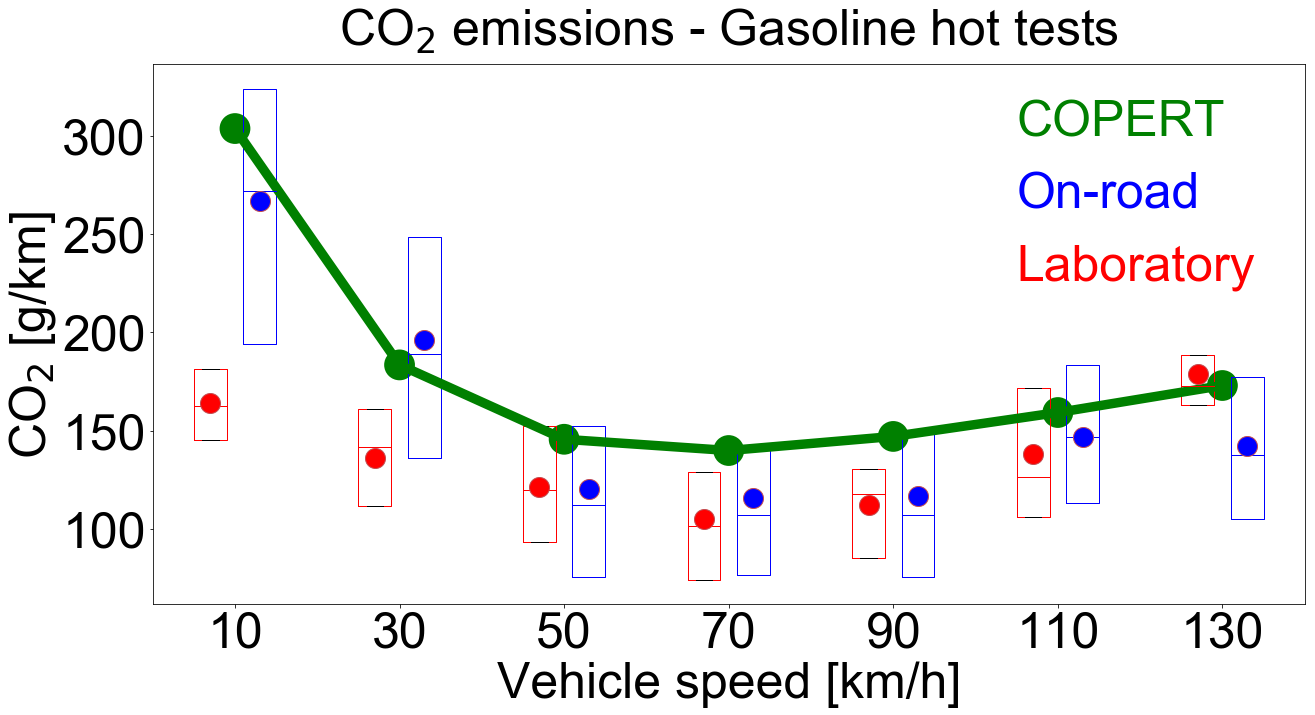

In [18]:
#Select fuel
fuel_type = 'Gasoline'  # Diesel or Gasoline
#Select segment
segment = 'Small'       # Mini; Small; Medium; Large-SUV-Executive; N1-II

fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
fontsize = 50
markersize = 20

# LAB
la = LABS_dco2_g.boxplot(by='Speed range', return_type='dict',
                                showmeans = True, grid = False, widths = 0.2, 
               positions = np.arange(14*10/speed_bin)-0.15, showfliers = False, whis = [25,75], #showcaps = False, #whis = [25,75], 
               meanprops=(dict(marker='o',markerfacecolor='red', markersize=markersize)),
               ax=ax0)
[ [item.set_color('r') for item in la[key]['boxes']] for key in la.keys() ]
[ [item.set_color('r') for item in la[key]['medians']] for key in la.keys() ]

# ROAD
tr = TRIPS_dco2_g.boxplot(by='Speed range', return_type='dict',
                                showmeans = True, grid = False, widths = 0.2, 
               positions = np.arange(14*10/speed_bin)+0.15, showfliers = False, whis = [25,75], showcaps = False,
               meanprops=(dict(marker='o',markerfacecolor='blue', markersize=markersize)),
                ax=ax0)
[ [item.set_color('blue') for item in tr[key]['boxes']] for key in tr.keys() ]
[ [item.set_color('blue') for item in tr[key]['medians']] for key in tr.keys() ]

plt.ylabel('CO$_2$ [g/km]', fontsize = fontsize)
plt.xlabel('Vehicle speed [km/h]', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
#plt.ylim(-10,500)
plt.suptitle
plt.suptitle('CO$_2$ emissions - Gasoline hot tests', fontsize = fontsize)
#plt.grid(True)
import seaborn as sns
if segment == 'N1-II':
    sns.pointplot(x= COPERT_x, y= COPERT_CO2H_DLCV_y, color ='green')
    plt.title('Diesel Euro 6 light commercial vehicle - HOT emissions', fontsize = fontsize)
elif fuel_type == 'Gasoline':
    if segment == 'Mini':
            sns.pointplot(x= COPERT_x, y= COPERT_CO2H_G_mini_y,
                         color ='green')
            plt.title('Euro 6 gasoline mini vehicle - HOT emissions', fontsize = fontsize)
    elif segment == 'Small':
            sns.pointplot(x= COPERT_x, y= COPERT_CO2H_G_small_y,
                          color ='green',scale=3)
            plt.title('')#"('CO$_2$ emissions - Gasoline hot tests', fontsize = fontsize)
    elif segment == 'Medium':
            sns.pointplot(x= COPERT_x, y= COPERT_CO2H_G_medium_y,
                          color ='green')
            plt.title('Euro 6 gasoline medium vehicle - HOT emissions', fontsize = fontsize)
    else:
        sns.pointplot(x= COPERT_x, y= COPERT_CO2H_G_LSE_y, label = 'COPERT 5', color ='green')
        plt.title('Euro 6 gasoline Large/SUV/Executive vehicle - HOT emissions', fontsize = fontsize)
elif fuel_type == 'Diesel':
    if segment == 'Mini':
            sns.pointplot(x= COPERT_x, y= COPERT_CO2H_D_mini_y,
                          color ='green')
            plt.title('Euro 6 diesel mini vehicle - HOT emissions', fontsize = fontsize)
    elif segment == 'Small':
            sns.pointplot(x= COPERT_x, y= COPERT_CO2H_D_small_y,
                          color ='green')
            plt.title('Diesel Euro 6 diesel small vehicle - HOT emissions', fontsize = fontsize)
    elif segment == 'Medium':
            sns.pointplot(x= COPERT_x, y= COPERT_CO2H_D_medium_y,
                          color ='green')
            plt.title('Diesel Euro 6 diesel medium vehicle - HOT emissions', fontsize = fontsize)
    else:
        sns.pointplot(x= COPERT_x, y= COPERT_CO2H_D_LSE_y, color ='green')
#         plt.title('Diesel Euro 6 diesel Large/SUV/Executive vehicle - HOT emissions', fontsize = fontsize)
plt.figtext(0.7, 0.8, 'COPERT', fontsize = fontsize, color = 'green')
plt.figtext(0.7, 0.7, 'On-road', fontsize = fontsize, color = 'blue')
plt.figtext(0.7, 0.6, 'Laboratory', fontsize = fontsize, color = 'red')
plt.show()
mpl.rcdefaults()

### NO$_x$

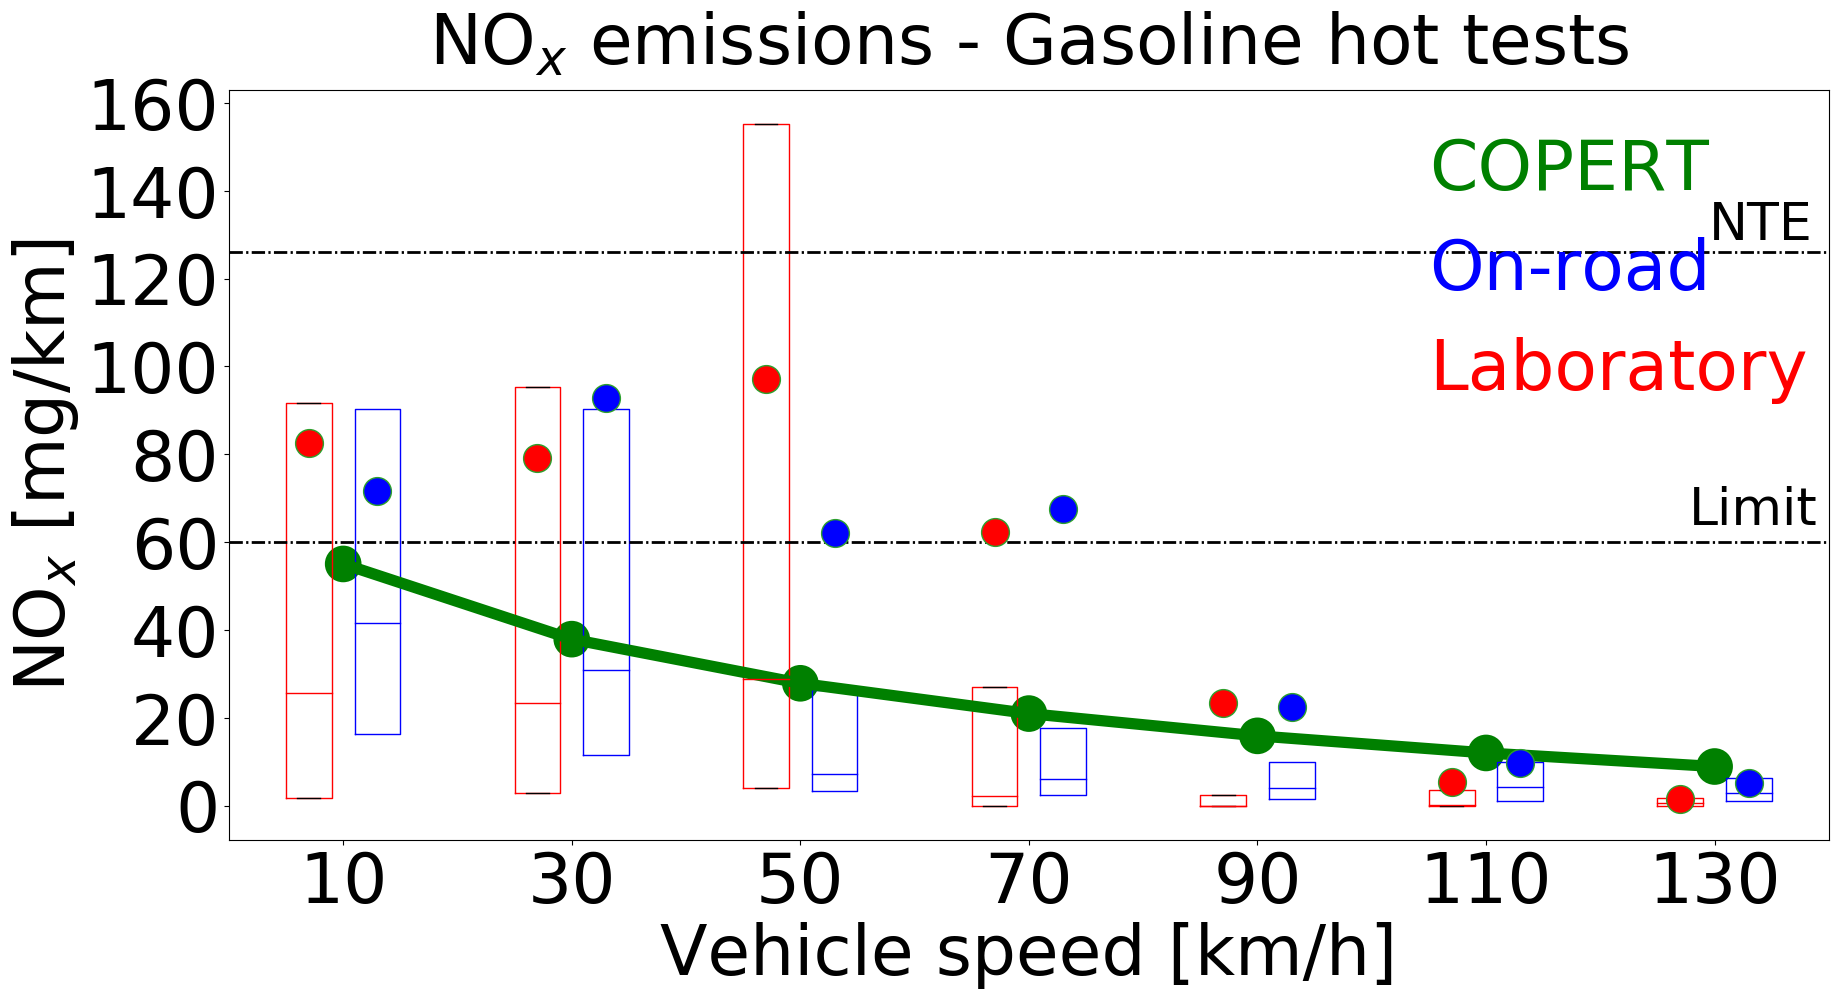

In [52]:
#Select fuel
fuel_type = 'Gasoline'  # Diesel or Gasoline
#Select segment
segment = 'Small'       # Mini; Small; Medium; Large-SUV-Executive; N1-II
# NOx limit
NOx_limg = 60 # for gasoline

fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
fontsize = 50
markersize = 20
# LAB
la = LABS_dnox_g.boxplot(by='Speed range', return_type='dict',
                                showmeans = True, grid = False, widths = 0.2, 
               positions = np.arange(14*10/speed_bin)-0.15, showfliers = False, whis = [25,75], #showcaps = False, #whis = [25,75], 
               meanprops=(dict(marker='o',markerfacecolor='red', markersize=markersize)),
               ax=ax0)
[ [item.set_color('r') for item in la[key]['boxes']] for key in la.keys() ]
[ [item.set_color('r') for item in la[key]['medians']] for key in la.keys() ]

# ROAD
tr = TRIPS_dnox_g.boxplot(by='Speed range', return_type='dict',
                                showmeans = True, grid = False, widths = 0.2, 
               positions = np.arange(14*10/speed_bin)+0.15, showfliers = False, whis = [25,75], showcaps = False,
               meanprops=(dict(marker='o',markerfacecolor='blue', markersize=markersize)),
                ax=ax0)
[ [item.set_color('blue') for item in tr[key]['boxes']] for key in tr.keys() ]
[ [item.set_color('blue') for item in tr[key]['medians']] for key in tr.keys() ]

plt.ylabel('NO$_x$ [mg/km]', fontsize = fontsize)
plt.xlabel('Vehicle speed [km/h]', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
#plt.ylim(-10,500)
plt.suptitle('NO$_x$ emissions - Gasoline hot tests', fontsize = fontsize)
#plt.grid(True)
import seaborn as sns
if segment == 'N1-II':
    sns.pointplot(x= COPERT_x, y= COPERT_CO2H_DLCV_y, color ='green')
    plt.title('Diesel Euro 6 light commercial vehicle - HOT emissions', fontsize = fontsize)
elif fuel_type == 'Gasoline':
    sns.pointplot(x= speed, y= EF_2016_g*1000, color ='green',scale=3)
#     sns.pointplot(x= speed, y= EF_2017_g*1000, color ='orange')
#     sns.pointplot(x= speed, y= EF_COP4_6_g*1000, color ='purple')
#     sns.pointplot(x= speed, y= EF_COP4_6c_g*1000, color ='pink')
    
plt.title('')#Euro 6 gasoline vehicle - HOT emissions', fontsize = fontsize)
plt.axhline(y=NOx_limg, color='k', linestyle='-.', linewidth=2 )
plt.axhline(y=NOx_limg*2.1, color='k', linestyle='-.', linewidth=2 )

#plt.title("")#('Euro 6 diesel vehicle - HOT emissions', fontsize = fontsize)
plt.figtext(0.7, 0.8, 'COPERT', fontsize = fontsize, color = 'green')      # COPERT 4 (Euro 6) & COPERT 5 (Euro 6 b,c)
# plt.figtext(0.52, 0.82, 'COPERT 4 (Euro 6 c) & COPERT 5 (Euro 6 d_temp)', fontsize = 22, color = 'orange')
# plt.figtext(0.6, 0.78, 'COPERT 4 - Euro 6', fontsize = 22, color = 'green')
# plt.figtext(0.6, 0.74, 'COPERT 4 - Euro 6c', fontsize = 22, color = 'orange')
#plt.figtext(0.451, 0.7, 'Fig 3 Leon (approx.)', fontsize = 22, color = [0.6, 0, 0.82, 0.6])
plt.figtext(0.7, 0.7, 'On-road', fontsize = fontsize, color = 'blue')
plt.figtext(0.7, 0.6, 'Laboratory', fontsize = fontsize, color = 'red')
plt.figtext(0.84, 0.75, 'NTE', fontsize = fontsize*0.75, color = 'k')
plt.figtext(0.83, 0.465, 'Limit', fontsize = fontsize*0.75, color = 'k')

plt.show()
mpl.rcdefaults()

#### Cold vs hot (NEDC & WLTP together)

In [50]:
#Parse from each VELA2 modal file: vehicle speed and instantaneous vehicle emission (g/s)
LABS = pd.DataFrame()
os.chdir(gas_coldhot)

dic_cold = {}
for file in glob.glob("*COLD*.xl*"):                                                          # THIS CAN BE XLS OR XLSX, check
    print(file)
    df = pd.read_excel(file, sheetname = 'Data', header = 0, parse_cols = "A:BC")
    df = df.dropna(axis=0, how='all')
    
    NOx = df['c_NOx_Dil_g_vec\n[grams]']
    NOx_sum = NOx.sum()*1000
    t = len(df.index)
#     v = df['DACtrl_ActualSpeed\n[kph]']            #group speed by intervals
#     t_s = len(df.index)                                                #  time(s)
#     t_h = t_s/3600                                                                    # time (hours)
#     v_mean = v.mean()                                                  # speed means
#     d = v_mean * t_h #b.reset_index(drop=True) * d.reset_index(drop=True)                # distance means
    
#     NOxkm = NOx_sum/d                                                    # NOx / km
    
    NOx_start = df['c_NOx_Dil_g_vec\n[grams]'][0:300]
    NOx_start_sum = NOx_start.sum()*1000
    t_start = 300
    
    NOx_end = df['c_NOx_Dil_g_vec\n[grams]'][300:len(df.index)]
    NOx_end_sum = NOx_end.sum()*1000
    t_end = t - t_start
#     v = df['DACtrl_ActualSpeed\n[kph]'][0:300]               #  group speed by intervals
#     t_s = 300                                                #  time(s)
#     t_h = t_s/3600                                                                    # time (hours)
#     v_mean = v.mean()                                                  # speed means
#     d = v_mean * t_h #b.reset_index(drop=True) * d.reset_index(drop=True)                # distance means
    
#     NOxkm_start = NOx_sum/d
    
    dic_cold[file] = [NOx_sum,t,NOx_start_sum,t_start,NOx_end_sum,t_end]            # save means in the dictionary
    

lab = pd.DataFrame()                                     # convert dic to dataframe
lab = lab.from_dict(dic_cold, orient='index')             # proper order
lab.columns = ['NOx','t','NOx_start','t_start','NOx_end','t_end']               # headers
lab_cold_g = lab

VELA2_08032017_001_Modal_TEST NEDC_COLD_FWD-sync_23°C.xls
VELA2_09032017_001_Modal_TEST NEDC_COLD_FWD-sync_23°C.xls
VELA2_10032017_001_Modal_TEST WLTP_COLD_FWD-sync_23°C.xls
VELA2_10112017_001_NEDC_COLD_Modal_DIL_RWD-sync_23°C.xlsx
VELA2_13102017_002_Modal_WLTC_COLD_FWD_23°C.xls
VELA2_13112017_001_NEDC_COLD_Modal_DIL_RWD-sync_23°C.xlsx
VELA2_14032017_001_Modal_TEST WLTP_COLD_FWD-sync_23°C.xls
VELA2_14112017_001_WLTC_COLD_Modal_DIL_RWD-sync_23°C.xlsx
VELA2_16102017_001_Modal_WLTC_COLD_FWD_23°C.xls
VELA2_17102017_001_Modal_WLTC_COLD_FWD_23°C.xls
VELA2_19102017_001_Modal_WLTC_COLD_FWD_23°C.xls
VELA2_20102017_001_Modal_WLTC_COLD_FWD_23°C.xls
VELA2_22032017_001_Modal_DIL_NEDC_COLD_FWD-sync_23°C.xlsx
VELA2_23032017_001_Modal_DIL_NEDC_COLD_FWD-sync_23°C.xlsx
VELA2_24032017_001_Modal_DIL_WLTP_COLD_FWD-sync_23°C.xlsx
VELA2_28032017_001_Modal_DIL_WLTP_COLD_FWD-sync_23°C.xlsx


In [72]:
lab_cold_d.mean()

NOx          2141.376759
t            1475.960000
NOx_start     223.377310
t_start       300.000000
NOx_end      1917.999449
t_end        1175.960000
dtype: float64

In [73]:
lab_hot_d.mean()

NOx          2742.246299
t            1478.520000
NOx_start     189.002928
t_start       300.000000
NOx_end      2553.243371
t_end        1178.520000
dtype: float64

In [53]:
lab_cold_g.t_start.mean()*100/lab_cold_g.t.mean()

19.12960306073649

In [47]:
lab_cold_g.NOx_start.mean()*100/lab_cold_g.NOx.mean()  # percentage representing first 5 minutes of tests (NOx emissions)

17.870317121423454

In [56]:
#Parse from each VELA2 modal file: vehicle speed and instantaneous vehicle emission (g/s)
LABS = pd.DataFrame()
os.chdir(gas_coldhot)

dic_hot = {}
for file in glob.glob("*HOT*.xl*"):                                                          # THIS CAN BE XLS OR XLSX, check
    print(file)
    df = pd.read_excel(file, sheetname = 'Data', header = 0, parse_cols = "A:BC")
    df = df.dropna(axis=0, how='all')
    
    NOx = df['c_NOx_Dil_g_vec\n[grams]']
    NOx_sum = NOx.sum()*1000
    t = len(df.index)
#     v = df['DACtrl_ActualSpeed\n[kph]']            #group speed by intervals
#     t_s = len(df.index)                                                #  time(s)
#     t_h = t_s/3600                                                                    # time (hours)
#     v_mean = v.mean()                                                  # speed means
#     d = v_mean * t_h #b.reset_index(drop=True) * d.reset_index(drop=True)                # distance means
    
#     NOxkm = NOx_sum/d                                                    # NOx / km
    
    NOx_start = df['c_NOx_Dil_g_vec\n[grams]'][0:300]
    NOx_start_sum = NOx_start.sum()*1000
    t_start = 300
    
    NOx_end = df['c_NOx_Dil_g_vec\n[grams]'][300:len(df.index)]
    NOx_end_sum = NOx_end.sum()*1000
    t_end = t - t_start
    
#     v = df['DACtrl_ActualSpeed\n[kph]'][0:300]               #  group speed by intervals
#     t_s = 300                                                #  time(s)
#     t_h = t_s/3600                                                                    # time (hours)
#     v_mean = v.mean()                                                  # speed means
#     d = v_mean * t_h #b.reset_index(drop=True) * d.reset_index(drop=True)                # distance means
    
#     NOxkm_start = NOx_sum/d
    
    dic_hot[file] = [NOx_sum,t,NOx_start_sum,t_start,NOx_end_sum,t_end]            # save means in the dictionary
    
    

lab = pd.DataFrame()                                     # convert dic to dataframe
lab = lab.from_dict(dic_hot, orient='index')             # proper order
lab.columns = ['NOx','t','NOx_start','t_start','NOx_end','t_end']               # headers
lab_hot_g = lab

VELA2_08032017_002_Modal_TEST NEDC_HOT_FWD-sync_23°C.xls
VELA2_09032017_002_Modal_TEST NEDC_HOT_FWD-sync_23°C.xls
VELA2_10032017_002_Modal_TEST WLTP_HOT_FWD-sync_23°C.xls
VELA2_10112017_002_NEDC_HOT_Modal_DIL_RWD-sync_23°C.xlsx
VELA2_13112017_002_NEDC_HOT_Modal_DIL_RWD-sync_23°C.xlsx
VELA2_14032017_002_Modal_TEST WLTP_HOT_FWD-sync_23°C.xls
VELA2_15112017_002_Modal_WLTC_HOT_RWD-sync_23°C.xlsx
VELA2_16102017_002_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_16102017_004_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_17102017_002_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_19102017_003_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_20102017_005_Modal_WLTC_HOT_FWD_23°C.xls
VELA2_22032017_002_Modal_DIL_NEDC_HOT_FWD-sync_23°C.xlsx
VELA2_23032017_002_Modal_DIL_NEDC_HOT_FWD-sync_23°C.xlsx
VELA2_24032017_002_Modal_DIL_WLTP_HOT_FWD-sync_23°C.xlsx
VELA2_28032017_002_Modal_DIL_WLTP_HOT_FWD-sync_23°C.xlsx


In [69]:
lab_hot_g

,NOx,t,NOx_start,t_start,NOx_end,t_end
VELA2_08032017_002_Modal_TEST NEDC_HOT_FWD-sync_23°C.xls,40.110933,1181,6.016455,300,34.094478,881
VELA2_09032017_002_Modal_TEST NEDC_HOT_FWD-sync_23°C.xls,31.411214,1181,10.862814,300,20.548400,881
VELA2_10032017_002_Modal_TEST WLTP_HOT_FWD-sync_23°C.xls,2150.377395,1801,147.021698,300,2003.355697,1501
VELA2_10112017_002_NEDC_HOT_Modal_DIL_RWD-sync_23°C.xlsx,76.077281,1181,22.003547,300,54.073734,881
VELA2_13112017_002_NEDC_HOT_Modal_DIL_RWD-sync_23°C.xlsx,42.272174,1180,9.481774,300,32.790400,880
VELA2_14032017_002_Modal_TEST WLTP_HOT_FWD-sync_23°C.xls,1421.410939,1800,81.042703,300,1340.368236,1500
VELA2_15112017_002_Modal_WLTC_HOT_RWD-sync_23°C.xlsx,291.519777,1801,100.926420,300,190.593357,1501
VELA2_16102017_002_Modal_WLTC_HOT_FWD_23°C.xls,1555.962326,1801,194.794359,300,1361.167967,1501
VELA2_16102017_004_Modal_WLTC_HOT_FWD_23°C.xls,1720.736781,1801,55.450959,300,1665.285822,1501
VELA2_17102017_002_Modal_WLTC_HOT_FWD_23°C.xls,1844.574948,1800,191.112451,300,1653.462496,1500


In [57]:
lab_hot_g.t_start.mean()*100/lab_hot_g.t.mean()      # pct of

19.13036546969033

In [58]:
lab_hot_g.NOx_start.mean()*100/lab_hot_g.NOx.mean()  # percentage representing first 5 minutes of tests (NOx emissions)

8.837129052751814

## Diesel

In [5]:
#Select fuel
fuel_type = 'Diesel'  # Diesel or Gasoline

#Select segment
segment = 'Medium'       # Mini; Small; Medium; Large-SUV-Executive; N1-II

if fuel_type == 'Diesel':
    UNOX = 0.001586
    UCO2 = 0.001517
elif fuel_type == 'Gasoline':
    UNOX = 0.001587
    UCO2 = 0.001518
else:
    print('Please indicate fuel_type = Diesel or Gasoline')

### COPERT emissions

In [6]:
COPERT_x = np.arange(10,140,speed_bin)
#DIESEL
## HOT NOx (Euro 6 up to 2016)
COPERT_NOxH_D_y = [818.6735244, 650.786133, 554.9328628, 488.6350055, 442.1591933, 411.9028883, 396.5422131, 396.122562, 411.9104063, 446.6303416, 505.1164426, 595.6781016, 732.9936337]
## HOT NOx LCV (Euro 6 up to 2017)
COPERT_NOxH_DLCV_y = [1315.446535, 1056.071174, 966.3911952, 922.7661543, 903.3628061, 905.4140312, 934.90859, 1006.133543, 1143.457552, 1379.609277, 1736.439437, 2173.013645, 2549.627755]
## HOT CO2 
COPERT_CO2H_D_mini_y = [205.9614428,127.8919211,105.6643416,98.50874733,97.42615155,99.29628668,102.7573462,107.1245326,112.0189459,117.2162149,122.5767304,128.0104079,133.4575731]
COPERT_CO2H_D_small_y = [268.7569869,201.7833634,171.4808445,155.0346646,145.4955563,140.0967925,137.6006418,137.4814386,139.6484265,144.3944831,152.5179486,165.7278212,187.7985386]
COPERT_CO2H_D_medium_y = [268.7569869,201.7833634,171.4808445,155.0346646,145.4955563,140.0967925,137.6006418,137.4814386,139.6484265,144.3944831,152.5179486,165.7278212,187.7985386]
COPERT_CO2H_D_LSE_y = [371.8114893,278.6017742,232.3134944,206.9172051,192.9687978,186.2899384,184.8275364,187.5466378,193.9807461,204.039236,217.9356567,236.1893114,259.691025]
COPERT_CO2H_DLCV_y = [398.8751795,281.0620062,235.9180384,214.5017732,204.2906457,200.6739172,201.6673049,206.4120283,214.6529791,226.5543252,242.6717533,264.0389623,292.3964226]


#GASOLINE
## HOT NOx
COPERT_NOxH_G_y = [55.02533777, 45.05171208, 37.90261269, 32.34940427, 27.85327257, 24.11821713, 20.9576872, 18.24469747, 15.88849121, 13.82194437, 11.99410598, 10.3654906, 8.904967399]
## HOT CO2 
COPERT_CO2H_G_mini_y = [238.0998286, 175.1471197, 140.4435812, 122.7711525, 115.5049756, 114.6495056, 117.7453852, 123.2512805, 130.1867257, 137.9209987, 146.0454992, 154.2949665, 162.4978992]
COPERT_CO2H_G_small_y = [303.6656843, 227.7744872, 183.4655019, 158.5240858, 145.6443469, 140.3683673, 139.9199999, 142.5374995, 147.0843214, 152.8172187, 159.2450414, 166.0409634, 172.9868566]
COPERT_CO2H_G_medium_y = [340.3732375, 257.5594346, 215.4681181, 191.7257645, 178.0045659, 170.5270757, 167.3630174, 167.4555069, 170.2122382, 175.3153071, 182.6273176, 192.1450204, 203.979569]
COPERT_CO2H_G_LSE_y = [533.1188866, 390.7685786, 316.8977024, 272.9201059, 244.905522, 226.6721595, 215.1429351, 208.7216504, 206.6440483, 208.7184744, 215.2707733, 227.2597736, 246.6438299]

array([ 818.6735244,  554.9328628,  442.1591933,  396.5422131,
        411.9104063,  505.1164426,  732.9936337])

In [7]:
if speed_bin == 10:
    COPERT_CO2H_G_small_y
    COPERT_NOxH_G_y
    COPERT_CO2H_D_medium_y = COPERT_CO2H_D_medium_y
    COPERT_NOxH_D_y = COPERT_NOxH_D_y
elif speed_bin == 20:
    indices=[0,2,4,6,8,10,12]
    COPERT_CO2H_G_small_y = np.take(COPERT_CO2H_G_small_y,indices)
    COPERT_NOxH_G_y = np.take(COPERT_NOxH_G_y,indices)
    COPERT_CO2H_D_medium_y = np.take(COPERT_CO2H_D_medium_y,indices)
    COPERT_NOxH_D_y = np.take(COPERT_NOxH_D_y,indices)
else:
    print("Insert valid speed bin")

### CO$_2$

In [8]:
#Parse from each VELA2 modal file: vehicle speed and instantaneous vehicle emission (g/s)
LABS = pd.DataFrame()
os.chdir(die_lab_co2)
for file in glob.glob("*.xl*"):                                                          # THIS CAN BE XLS OR XLSX, check
    print(file)
    df = pd.read_excel(file, sheetname = 'Data', header = 0, parse_cols = "A:BC")
    df = df.dropna(axis=0, how='all')
    LAB = pd.DataFrame({'Time [s]': df['DACtrl_TraceTime\n[sec]'],
                         'Vehicle speed [km/h]':df['DACtrl_ActualSpeed\n[kph]'],
                        'CO2 [g/s]': df['c_CO2_Dil_g_vec\n[grams]'],
                         'NOx [g/s]':df['c_NOx_Dil_g_vec\n[grams]']},
                        dtype=float)
    #Calculate stop periods. Stop = 1. Move = 0
    LAB.loc[LAB['Vehicle speed [km/h]'] < 2, 'STOP, 0 = YES'] = 0
    LAB.loc[LAB['Vehicle speed [km/h]'] >= 2, 'STOP, 0 = YES'] = 1
    
    #Calculate distance-specific NOx emission [mg/km] and CO2 [g/km]
    #Seconds when vehicle is stopped (< 1 km/h) do not get distance-specific emission calculation.
    LAB['Inst. speed when vehicle moves'] = LAB['Vehicle speed [km/h]']*LAB['STOP, 0 = YES']
    LAB['Inst. Mass NOx when vehicle moves'] = LAB['NOx [g/s]']*LAB['STOP, 0 = YES']
    LAB['Distance when vehicle moves'] = np.where(LAB['Inst. speed when vehicle moves']>0,LAB['Inst. speed when vehicle moves']/3600,0)
    LAB['NOx [mg/km]'] = LAB['Inst. Mass NOx when vehicle moves']*1000/LAB['Distance when vehicle moves']
    LAB['Inst. Mass CO2 when vehicle moves'] = LAB['CO2 [g/s]']*LAB['STOP, 0 = YES']
    LAB['CO2 [g/km]'] = LAB['Inst. Mass CO2 when vehicle moves']/LAB['Distance when vehicle moves']
    
#     LAB["Cumulative distance"] = np.cumsum(LAB["Distance when vehicle moves"])
#     LAB["Distance categories"] = pd.cut(LAB["Cumulative distance"], np.arange(0,max(LAB["Cumulative distance"])+1,0.1))
    

    #Merge all routes together
    LABS = LABS.append(LAB)
LABSdc = LABS.reset_index()

VELA2_01072016_002_Modal_TP_NEDC_HOT_FWD_23C.xls


D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


VELA2_01072016_004_Modal_TP_WLTP_HOT_FWD_23C.xls


D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


VELA2_01122017_002_Modal_TP_WLTC_HOT_FWD-sync_23°C.xlsx
VELA2_01122017_006_Modal_TP_WLTC_HOT_FWD-sync_23°C.xlsx
VELA2_02052017_002_Modal_DIL_NEDC_HOT_FWD-sync_23°C.xlsx
VELA2_03052017_002_Modal_DIL_WLTP_HOT_FWD-sync_23°C.xlsx
VELA2_05042017_003_Modal_DIL_NEDC_HOT START_4WD_23°C.xls
VELA2_05052017_002_Modal_DIL_WLTP_HOT_FWD-sync_23°C.xlsx
VELA2_05072016_002_Modal_NEDC_HOT_FWD_23C.xls
VELA2_05072016_005_Modal_WLTP_HOT_FW_23C.xls
VELA2_06042017_002_Modal_DIL_NEDC_HOT START_4WD_23°C.xls
VELA2_06072016_003_Modal_WLTP_HOT_FWD_23C.xls
VELA2_06072017_003_Modal_DIL_WLTP_HOT START_4WD_23°C.xls
VELA2_06122017_002_Modal_WLTC_HOT_FWD-sync_23°C.xlsx
VELA2_07072017_002_Modal_DIL_WLTP_HOT START_4WD_23°C.xls
VELA2_11052017_002_Modal_DIL_WLTP_HOT_FWD-sync_23°C.xlsx
VELA2_13072016_003_Modal_WLTP_HOT_4WD_23C.xls
VELA2_14072016_003_Modal_NEDC_HOT_4WD_23C.xls
VELA2_15072016_005_Modal_NEDC_HOT_FWDsync_23C.xls
VELA2_17052017_002_Modal_DIL_WLTP_HOT_FWD-sync_23°C.xlsx
VELA2_28042017_003_Modal_DIL_NEDC_HOT_FWD-s

In [9]:
#Reclassify vehicle speed in bins of 10 km/h. Labels indicate half of the bin speed.
LABSdc['Speed range']= pd.cut(LABSdc['Vehicle speed [km/h]'], np.arange(0,145,speed_bin),
                              labels=(np.arange(5*speed_bin/10,145,speed_bin)))
LABSdc = LABSdc.dropna(axis=0, how='all')

LABSdc["Cumulative distance"] = np.cumsum(LABSdc["Distance when vehicle moves"])

LABSdc["Distance categories"] = pd.cut(LABSdc["Cumulative distance"],
                                       np.arange(0,max(LABSdc["Cumulative distance"])+1,dist_bin))
 
LABSdc_distbin = LABSdc.groupby(LABSdc["Distance categories"]).mean() # Group by 1km distance bins and get means

LABSdc_distbin['Speed range']= pd.cut(LABSdc_distbin['Inst. speed when vehicle moves'],
                         np.arange(0,145,speed_bin), labels=(np.arange(5*speed_bin/10,145,speed_bin)))    # 
LABSdc_distbin = LABSdc_distbin.dropna(axis=0, how='all')                      # Remove rows full of NaN

LABSdc_speedbin = LABSdc_distbin.groupby(LABSdc_distbin["Speed range"]).mean()               # Group by 10km/h speed bins
LABSdc_distbin

,index,Time [s],Vehicle speed [km/h],CO2 [g/s],NOx [g/s],"STOP, 0 = YES",Inst. speed when vehicle moves,Inst. Mass NOx when vehicle moves,Distance when vehicle moves,NOx [mg/km],Inst. Mass CO2 when vehicle moves,CO2 [g/km],Cumulative distance,Speed range
Distance categories,,,,,,,,,,,,,,
"(0.0, 0.5]",74.500000,75.222865,14.154289,0.578815,0.000168,0.634921,14.119872,0.000154,0.003922,36.947351,0.513114,146.471364,0.218723,10.0
"(0.5, 1.0]",160.000000,160.716884,40.335076,1.000260,0.000773,1.000000,40.335076,0.000773,0.011204,69.442822,1.000260,84.174090,0.778550,50.0
"(1.0, 1.5]",257.000000,257.704999,12.120211,0.503792,0.000313,0.557047,12.062270,0.000252,0.003351,87.613003,0.439960,149.628597,1.192634,10.0
"(1.5, 2.0]",353.000000,353.667665,41.783137,1.037692,0.000769,1.000000,41.783137,0.000769,0.011606,64.552512,1.037692,83.287764,1.772605,50.0
"(2.0, 2.5]",450.000000,450.674684,12.037199,0.493360,0.000260,0.569536,11.995499,0.000225,0.003332,81.491187,0.431936,151.072178,2.202513,10.0
"(2.5, 3.0]",546.500000,547.181319,42.222595,1.063603,0.000685,1.000000,42.222595,0.000685,0.011728,56.019404,1.063603,85.101130,2.767832,50.0
"(3.0, 3.5]",643.000000,643.646086,12.056451,0.488543,0.000202,0.569536,12.013803,0.000180,0.003337,60.786569,0.433153,160.726851,3.210653,10.0
"(3.5, 4.0]",740.000000,740.637992,42.116090,1.077525,0.000522,1.000000,42.116090,0.000522,0.011699,43.069275,1.077525,86.600844,3.766290,50.0
"(4.0, 4.5]",801.500000,801.582281,22.343079,0.791206,0.000270,0.625000,22.307324,0.000263,0.006196,39.187873,0.750021,125.783943,4.135786,30.0


In [10]:
#PARSE EMROAD files: vehicle speed (GPS), and instantaneous vehicle emission (g/s)
TRIPS = pd.DataFrame()
os.chdir(die_road_co2)
for file in glob.glob("*.xlsx"):          
    veh_id = file[:5]
    route_id = file[6:9]
    test_date = datetime.strptime(file[10:20], '%Y_%m_%d')
    print('Parsing ', veh_id+'_'+route_id+' done on '+ str(test_date.strftime("%A %d. %B %Y")))
    df = pd.read_excel(file, sheetname = 'TEST DATA', skiprows = [0])
    df = df.drop(df.index[0])
    df = df.dropna(axis=0, how='all')
    TRIP = pd.DataFrame({'Time [s]': df['Time'],
                         'Vehicle speed [km/h]':df['GPS Vehicle_Speed'],
                         'NOx [ppm]':df['Wet_NOx'],
                         'CO2 [ppm]': df['Wet_CO2'],
                         'Exhaust Mass Flow [kg/h]':df['Corrected_Exhaust_Mass_Flow'],},
                        dtype=float)
    TRIP['Route'] = route_id
    TRIP['Date'] = test_date.strftime("%d/%b/%Y")
    #Calculate stop periods. Stop = 1. Move = 0
    TRIP.loc[TRIP['Vehicle speed [km/h]'] < 2, 'STOP, 0 = YES'] = 0
    TRIP.loc[TRIP['Vehicle speed [km/h]'] >= 2, 'STOP, 0 = YES'] = 1
    #Cold emissions < 300 seconds
    TRIP.loc[TRIP['Time [s]'] < 300, 'COLD, 1 = YES'] = 1
    TRIP.loc[TRIP['Time [s]'] >= 300, 'COLD, 1 = YES'] = 0
    #Calculate instantaneous NOx and CO2 mass emission [g/s] from exhaust flow and wet emission
    TRIP['Inst. Mass NOx [g/s]'] = TRIP['Exhaust Mass Flow [kg/h]']*TRIP['NOx [ppm]']*UNOX/3600
    TRIP['Inst. Mass CO2 [g/s]'] = TRIP['Exhaust Mass Flow [kg/h]']*TRIP['CO2 [ppm]']*UCO2/3600
    #Calculate distance-specific NOx  [mg/km] & CO2 emission [g/km]
    #Seconds when vehicle is stopped (< 1 km/h) do not get distance-specific emission calculation.
    TRIP['Inst. speed when vehicle moves'] = TRIP['Vehicle speed [km/h]']*TRIP['STOP, 0 = YES']
    TRIP['Inst. Mass NOx when vehicle moves'] = TRIP['Inst. Mass NOx [g/s]']*TRIP['STOP, 0 = YES']
    TRIP['Distance when vehicle moves'] = np.where(TRIP['Inst. speed when vehicle moves']>0,TRIP['Inst. speed when vehicle moves']/3600,0)
    TRIP['NOx [mg/km]'] = TRIP['Inst. Mass NOx when vehicle moves']*1000/TRIP['Distance when vehicle moves']
    TRIP['Inst. Mass CO2 when vehicle moves'] = TRIP['Inst. Mass CO2 [g/s]']*TRIP['STOP, 0 = YES']
    TRIP['CO2 [g/km]'] = TRIP['Inst. Mass CO2 when vehicle moves']/TRIP['Distance when vehicle moves']
    
    #Merge all routes together
    TRIPS = TRIPS.append(TRIP)
TRIPSdc = TRIPS.reset_index()

Parsing  CN002_ESP done on Thursday 16. June 2016


D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


Parsing  CN002_ESP done on Friday 17. June 2016
Parsing  CN002_ESP done on Monday 20. June 2016
Parsing  CN002_ESP done on Monday 20. June 2016
Parsing  CN002_LAB done on Friday 24. June 2016
Parsing  CN002_LAB done on Friday 24. June 2016
Parsing  CN002_LAB done on Tuesday 28. June 2016
Parsing  CN002_LAB done on Tuesday 28. June 2016
Parsing  FT058_ESP done on Tuesday 18. April 2017
Parsing  FT058_ESP done on Wednesday 19. April 2017
Parsing  FT058_ESP done on Thursday 20. April 2017
Parsing  FT058_LAB done on Tuesday 18. April 2017
Parsing  FT058_LAB done on Wednesday 19. April 2017
Parsing  KA001_ESP done on Monday 20. November 2017
Parsing  KA001_ESP done on Tuesday 21. November 2017
Parsing  KA001_LAB done on Tuesday 21. November 2017
Parsing  KA001_LAB done on Friday 24. November 2017
Parsing  VW035_ESP done on Tuesday 12. July 2016
Parsing  VW035_ESP done on Tuesday 12. July 2016
Parsing  VW035_LAB done on Friday 08. July 2016
Parsing  VW035_LAB done on Monday 11. July 2016
Par

In [11]:
TRIPSdc = TRIPSdc[TRIPSdc['COLD, 1 = YES'] == 0]

#Reclassify vehicle speed in bins of 10 km/h. Labels indicate half of the bin speed.
TRIPSdc['Speed range']= pd.cut(TRIPSdc['Vehicle speed [km/h]'], np.arange(0,145,speed_bin),
                            labels=(np.arange(5*speed_bin/10,145,speed_bin)))
TRIPSdc = TRIPSdc.dropna(axis=0, how='all')

TRIPSdc["Cumulative distance"] = np.cumsum(TRIPSdc["Distance when vehicle moves"])
 
TRIPSdc["Distance categories"] = pd.cut(TRIPSdc["Cumulative distance"],
                                          np.arange(0,max(TRIPSdc["Cumulative distance"])+1, dist_bin))

TRIPSdc_distbin = TRIPSdc.groupby(TRIPSdc["Distance categories"]).mean()
TRIPSdc_distbin['Speed range']= pd.cut(TRIPSdc_distbin["Inst. speed when vehicle moves"], np.arange(0,145,speed_bin),
                                     labels=(np.arange(5*speed_bin/10,145,speed_bin)))
TRIPSdc_distbin = TRIPSdc_distbin.dropna(axis=0, how='all')

TRIPSdc_speedbin = TRIPSdc_distbin.groupby(TRIPSdc_distbin["Speed range"]).mean()
TRIPSdc_speedbin.mean()

index                                 3906.441444
Time [s]                              3905.441444
Vehicle speed [km/h]                    70.583123
NOx [ppm]                              139.788143
CO2 [ppm]                            62635.787249
Exhaust Mass Flow [kg/h]                96.770113
STOP, 0 = YES                            0.908295
COLD, 1 = YES                            0.000000
Inst. Mass NOx [g/s]                     0.009460
Inst. Mass CO2 [g/s]                     3.029867
Inst. speed when vehicle moves          70.575546
Inst. Mass NOx when vehicle moves        0.009426
Distance when vehicle moves              0.019604
NOx [mg/km]                            475.220825
Inst. Mass CO2 when vehicle moves        2.996942
CO2 [g/km]                             188.414381
Cumulative distance                   1153.117512
dtype: float64

In [12]:
# Diesel

# CO2
TRIPS_co2_d = TRIPSdc[['CO2 [g/km]','Speed range']]
TRIPS_co2_d = TRIPS_co2_d.dropna(axis=0, how='any')
LABS_co2_d = LABSdc[['CO2 [g/km]','Speed range']]
LABS_co2_d = LABS_co2_d.dropna(axis=0, how='any')

# CO2 distance bins
TRIPS_dco2_d = TRIPSdc_distbin[['CO2 [g/km]','Speed range']]
TRIPS_dco2_d = TRIPS_dco2_d.dropna(axis=0, how='any')
LABS_dco2_d = LABSdc_distbin[['CO2 [g/km]','Speed range']]
LABS_dco2_d = LABS_dco2_d.dropna(axis=0, how='any')

D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\seaborn\categorical.py:1443: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


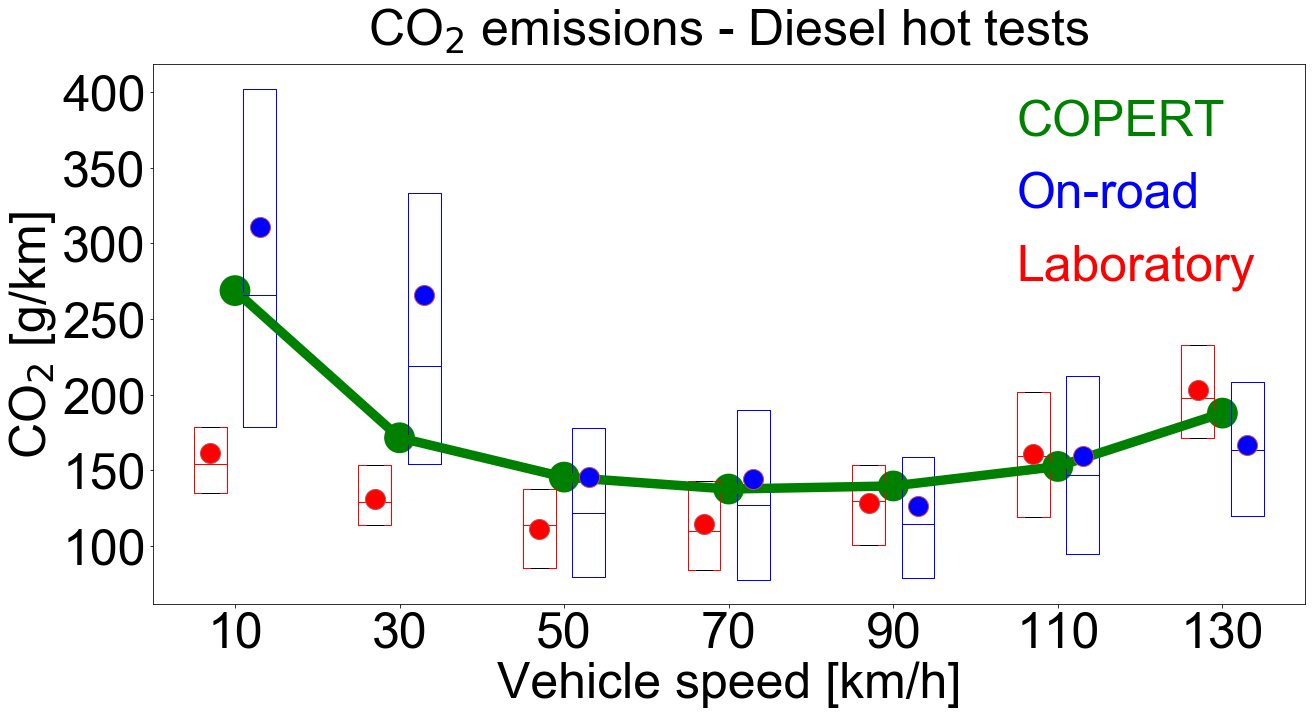

In [13]:
#Select fuel
fuel_type = 'Diesel'  # Diesel or Gasoline
#Select segment
segment = 'Medium'       # Mini; Small; Medium; Large-SUV-Executive; N1-II

fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
fontsize = 50
markersize = 20

# LAB
la = LABS_dco2_d.boxplot(by='Speed range', return_type='dict',
                                showmeans = True, grid = False, widths = 0.2, 
               positions = np.arange(14*10/speed_bin)-0.15, showfliers = False, whis = [25,75], #showcaps = False, #whis = [25,75], 
               meanprops=(dict(marker='o',markerfacecolor='red', markersize=markersize)),
               ax=ax0)
[ [item.set_color('r') for item in la[key]['boxes']] for key in la.keys() ]
[ [item.set_color('r') for item in la[key]['medians']] for key in la.keys() ]

# ROAD
tr = TRIPS_dco2_d.boxplot(by='Speed range', return_type='dict',
                                showmeans = True, grid = False, widths = 0.2, 
               positions = np.arange(14*10/speed_bin)+0.15, showfliers = False, whis = [25,75], showcaps = False,
               meanprops=(dict(marker='o',markerfacecolor='blue', markersize=markersize)),
                ax=ax0)
[ [item.set_color('blue') for item in tr[key]['boxes']] for key in tr.keys() ]
[ [item.set_color('blue') for item in tr[key]['medians']] for key in tr.keys() ]

plt.ylabel('CO$_2$ [g/km]', fontsize = fontsize)
plt.xlabel('Vehicle speed [km/h]', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
#plt.ylim(-10,500)
plt.suptitle('CO$_2$ emissions - Diesel hot tests', fontsize = fontsize)
#plt.grid(True)
import seaborn as sns
if segment == 'N1-II':
    sns.pointplot(x= COPERT_x, y= COPERT_CO2H_DLCV_y, color ='green')
    plt.title('Diesel Euro 6 light commercial vehicle - HOT emissions', fontsize = fontsize)
elif fuel_type == 'Gasoline':
    if segment == 'Mini':
            sns.pointplot(x= COPERT_x, y= COPERT_CO2H_G_mini_y,
                         color ='green')
            plt.title('Euro 6 gasoline mini vehicle - HOT emissions', fontsize = fontsize)
    elif segment == 'Small':
            sns.pointplot(x= COPERT_x, y= COPERT_CO2H_G_small_y,
                          color ='green')
            plt.title('Euro 6 gasoline small vehicle - HOT emissions', fontsize = fontsize)
    elif segment == 'Medium':
            sns.pointplot(x= COPERT_x, y= COPERT_CO2H_G_medium_y,
                          color ='green')
            plt.title('Euro 6 gasoline medium vehicle - HOT emissions', fontsize = fontsize)
    else:
        sns.pointplot(x= COPERT_x, y= COPERT_CO2H_G_LSE_y, label = 'COPERT 5', color ='green')
        plt.title('Euro 6 gasoline Large/SUV/Executive vehicle - HOT emissions', fontsize = fontsize)
elif fuel_type == 'Diesel':
    if segment == 'Mini':
            sns.pointplot(x= COPERT_x, y= COPERT_CO2H_D_mini_y,
                          color ='green')
            plt.title('Euro 6 diesel mini vehicle - HOT emissions', fontsize = fontsize)
    elif segment == 'Small':
            sns.pointplot(x= COPERT_x, y= COPERT_CO2H_D_small_y,
                          color ='green')
            plt.title('Diesel Euro 6 diesel small vehicle - HOT emissions', fontsize = fontsize)
    elif segment == 'Medium':
            sns.pointplot(x= COPERT_x, y= COPERT_CO2H_D_medium_y,
                          color ='green',scale = 3)
            plt.title('')#Euro 6 diesel medium vehicle - HOT emissions', fontsize = fontsize)
    else:
        sns.pointplot(x= COPERT_x, y= COPERT_CO2H_D_LSE_y, color ='green')
#         plt.title('Diesel Euro 6 diesel Large/SUV/Executive vehicle - HOT emissions', fontsize = fontsize)
plt.figtext(0.7, 0.8, 'COPERT', fontsize = fontsize, color = 'green')
plt.figtext(0.7, 0.7, 'On-road', fontsize = fontsize, color = 'blue')
plt.figtext(0.7, 0.6, 'Laboratory', fontsize = fontsize, color = 'red')
plt.show()
mpl.rcdefaults()

### NO$_x$

Formula to get NOx EF for COPERT 5 (Guidebook 2016)

In [14]:
# HOT NOx parameters, diesel medium (although for NOx there shouldn't be categorizatoin by engine capacity)

alpha = 6.67136e-5
beta = -0.011381467
gamma = 0.945951727
delta = 1.923608149
epsilon = -5.15046e-5
zeta = 0.004264272
eta = 1 

RF_2016 = 0.17630645       # reduction factor for Euro 6 b,c (up to 2016)
RF_2017 = 0.370710835      # RF for Euro 6 d_temp (2017-2019)
# RF = 0.694345263      # RF for Euro 6 d (2020+) 

speed = np.arange(10,140,speed_bin) # in km/h

EF_2016_d = (alpha*speed*speed + beta*speed + gamma + delta/speed)/(epsilon*speed*speed + zeta*speed + eta) * (1-RF_2016)
EF_2017_d = (alpha*speed*speed + beta*speed + gamma + delta/speed)/(epsilon*speed*speed + zeta*speed + eta) * (1-RF_2017)
EF_2016_d

array([0.81867352, 0.55493286, 0.44215919, 0.39654221, 0.41191041,
       0.50511644, 0.73299363])

Formula to get NOx EF for COPERT 4 (Guidebook 2013)

In [15]:
# Euro 6 - COPERT 4
a = 4.36e-1
b = 1e-2
c = -5.39e-3
d = -1.02e-4
e = 2.90e-5
f = -4.61e-1

speed = np.arange(10,140,speed_bin) # in km/h

# EF_COP4 = (a + c*speed + e*speed*speed)/(1 + b*speed + d*speed*speed) + f/speed  # WRONG formula
EF_COP4_6_d =  (a + c*speed + e*speed*speed + f / speed )/(1 + b*speed + d*speed*speed)
EF_COP4_6_d

array([0.31097449, 0.23591569, 0.18456225, 0.16181827, 0.16826018,
       0.21922972, 0.38502924])

In [16]:
# Euro 6 c - COPERT 4

a = 2.33e-1
b = 1e-2
c = -2.88e-3
d = -1.02e-4
e = 1.55e-5
f = 2.46e-1

speed = np.arange(10,140,speed_bin) # in km/h

# EF_COP4 = (a + c*speed + e*speed*speed)/(1 + b*speed + d*speed*speed) + f/speed  # WRONG formula
EF_COP4_6c_d =  (a + c*speed + e*speed*speed + f / speed )/(1 + b*speed + d*speed*speed)
EF_COP4_6c_d

array([0.21136906, 0.13967058, 0.10656225, 0.09237151, 0.09506736,
       0.12241437, 0.21249967])

In [17]:
# Euro 5 - COPERT 4
a = 9.46e-1
b = 4.26e-3
c = -1.14e-2
d = -5.15e-5
e = 6.67e-5
f = 1.92

speed = np.arange(10,140,speed_bin) # in km/h

# EF_COP4 = (a + c*speed + e*speed*speed)/(1 + b*speed + d*speed*speed) + f/speed  # WRONG formula
EF_COP4_5_d =  (a + c*speed + e*speed*speed + f / speed )/(1 + b*speed + d*speed*speed)
EF_COP4_5_d

array([0.99346475, 0.67319802, 0.53599262, 0.48023959, 0.49842518,
       0.6109463 , 0.88667676])

In [18]:
#Parse from each VELA2 modal file: vehicle speed and instantaneous vehicle emission (g/s)
LABS = pd.DataFrame()
os.chdir(die_lab_nox)
for file in glob.glob("*.xl*"):                                                          # THIS CAN BE XLS OR XLSX, check
    print(file)
    df = pd.read_excel(file, sheetname = 'Data', header = 0, parse_cols = "A:BC")
    df = df.dropna(axis=0, how='all')
    LAB = pd.DataFrame({'Time [s]': df['DACtrl_TraceTime\n[sec]'],
                         'Vehicle speed [km/h]':df['DACtrl_ActualSpeed\n[kph]'],
                        'CO2 [g/s]': df['c_CO2_Dil_g_vec\n[grams]'],
                         'NOx [g/s]':df['c_NOx_Dil_g_vec\n[grams]']},
                        dtype=float)
    #Calculate stop periods. Stop = 1. Move = 0
    LAB.loc[LAB['Vehicle speed [km/h]'] < 2, 'STOP, 0 = YES'] = 0
    LAB.loc[LAB['Vehicle speed [km/h]'] >= 2, 'STOP, 0 = YES'] = 1
    
    #Calculate distance-specific NOx emission [mg/km] and CO2 [g/km]
    #Seconds when vehicle is stopped (< 1 km/h) do not get distance-specific emission calculation.
    LAB['Inst. speed when vehicle moves'] = LAB['Vehicle speed [km/h]']*LAB['STOP, 0 = YES']
    LAB['Inst. Mass NOx when vehicle moves'] = LAB['NOx [g/s]']*LAB['STOP, 0 = YES']
    LAB['Distance when vehicle moves'] = np.where(LAB['Inst. speed when vehicle moves']>0,LAB['Inst. speed when vehicle moves']/3600,0)
    LAB['NOx [mg/km]'] = LAB['Inst. Mass NOx when vehicle moves']*1000/LAB['Distance when vehicle moves']
    LAB['Inst. Mass CO2 when vehicle moves'] = LAB['CO2 [g/s]']*LAB['STOP, 0 = YES']
    LAB['CO2 [g/km]'] = LAB['Inst. Mass CO2 when vehicle moves']/LAB['Distance when vehicle moves']
    
    #Merge all routes together
    LABS = LABS.append(LAB)
LABSdn = LABS.reset_index()

VELA2_01072016_002_Modal_TP_NEDC_HOT_FWD_23C.xls


D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


VELA2_01072016_004_Modal_TP_WLTP_HOT_FWD_23C.xls
VELA2_01122017_002_Modal_TP_WLTC_HOT_FWD-sync_23°C.xlsx
VELA2_01122017_006_Modal_TP_WLTC_HOT_FWD-sync_23°C.xlsx
VELA2_02052017_002_Modal_DIL_NEDC_HOT_FWD-sync_23°C.xlsx
VELA2_03052017_002_Modal_DIL_WLTP_HOT_FWD-sync_23°C.xlsx
VELA2_03082017_002_Modal_WLTC_HOT_4WD_23°C.xlsx
VELA2_03102017_002_Modal_NEDC_HOT_RWD-sync_23°C.xlsx
VELA2_04082017_002_Modal_WLTC_HOT_4WD_23°C.xlsx
VELA2_05042017_003_Modal_DIL_NEDC_HOT START_4WD_23°C.xls
VELA2_05052017_002_Modal_DIL_WLTP_HOT_FWD-sync_23°C.xlsx
VELA2_05072016_002_Modal_NEDC_HOT_FWD_23C.xls
VELA2_05072016_005_Modal_WLTP_HOT_FW_23C.xls
VELA2_06042017_002_Modal_DIL_NEDC_HOT START_4WD_23°C.xls
VELA2_06072016_003_Modal_WLTP_HOT_FWD_23C.xls
VELA2_06072017_003_Modal_DIL_WLTP_HOT START_4WD_23°C.xls
VELA2_06102017_002_Modal_WLTC_HOT_RWD-sync_23°C.xlsx
VELA2_06122017_002_Modal_WLTC_HOT_FWD-sync_23°C.xlsx
VELA2_07072017_002_Modal_DIL_WLTP_HOT START_4WD_23°C.xls
VELA2_09082017_002_Modal_NEDC_HOT_4WD_23°C.xlsx


In [45]:
#Reclassify vehicle speed in bins of 10 km/h. Labels indicate half of the bin speed.
LABSdn['Speed range']= pd.cut(LABSdn['Vehicle speed [km/h]'], np.arange(0,145,speed_bin),
                              labels=(np.arange(5*speed_bin/10,145,speed_bin)))
LABSdn = LABSdn.dropna(axis=0, how='all')

LABSdn["Cumulative distance"] = np.cumsum(LABSdn["Distance when vehicle moves"])

LABSdn["Distance categories"] = pd.cut(LABSdn["Cumulative distance"],
                                       np.arange(0,max(LABSdn["Cumulative distance"])+1,dist_bin))
 
LABSdn_distbin = LABSdn.groupby(LABSdn["Distance categories"]).mean() # Group by 1km distance bins and get means

LABSdn_distbin['Speed range']= pd.cut(LABSdn_distbin['Inst. speed when vehicle moves'],
                         np.arange(0,145,speed_bin), labels=(np.arange(5*speed_bin/10,145,speed_bin)))    # 
LABSdn_distbin = LABSdn_distbin.dropna(axis=0, how='all')                      # Remove rows full of NaN

LABSdn_speedbin = LABSdn_distbin.groupby(LABSdn_distbin["Speed range"]).mean()               # Group by 10km/h speed bins
LABSdn_distbin.describe()

,index,Time [s],Vehicle speed [km/h],CO2 [g/s],NOx [g/s],"STOP, 0 = YES",Inst. speed when vehicle moves,Inst. Mass NOx when vehicle moves,Distance when vehicle moves,NOx [mg/km],Inst. Mass CO2 when vehicle moves,CO2 [g/km],Cumulative distance
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,1064.173442,1064.330422,67.082204,2.828747,0.003240,0.932722,67.076962,0.003237,0.018632,135.597786,2.815189,144.987701,279.998295
std,464.421664,464.183617,36.174874,2.274637,0.008995,0.146441,36.182095,0.008996,0.010051,281.049856,2.286926,56.654212,161.729409
min,52.500000,53.330774,8.656395,0.182161,0.000000,0.402062,8.616667,0.000000,0.002394,0.000000,0.041905,8.594465,0.218723
25%,772.000000,771.927042,35.905103,1.121808,0.000105,1.000000,35.905103,0.000105,0.009974,7.685530,1.097800,107.432944,140.161865
50%,1090.750000,1090.682508,67.611713,1.984187,0.000618,1.000000,67.611713,0.000606,0.018781,44.015180,1.984187,140.341266,280.009882
75%,1480.500000,1480.413173,96.933580,3.772562,0.002277,1.000000,96.933580,0.002277,0.026926,134.948699,3.772562,178.479830,419.883068
max,1774.500000,1774.492889,129.739409,11.946601,0.082619,1.000000,129.739409,0.082619,0.036039,2498.794373,11.946601,380.589574,559.665161


In [20]:
#PARSE EMROAD files: vehicle speed (GPS), and instantaneous vehicle emission (g/s)
TRIPS = pd.DataFrame()
os.chdir(die_road_nox)
for file in glob.glob("*.xlsx"):          
    veh_id = file[:5]
    route_id = file[6:9]
    test_date = datetime.strptime(file[10:20], '%Y_%m_%d')
    print('Parsing ', veh_id+'_'+route_id+' done on '+ str(test_date.strftime("%A %d. %B %Y")))
    df = pd.read_excel(file, sheetname = 'TEST DATA', skiprows = [0])
    df = df.drop(df.index[0])
    df = df.dropna(axis=0, how='all')
    TRIP = pd.DataFrame({'Time [s]': df['Time'],
                         'Vehicle speed [km/h]':df['GPS Vehicle_Speed'],
                         'NOx [ppm]':df['Wet_NOx'],
                         'CO2 [ppm]': df['Wet_CO2'],
                         'Exhaust Mass Flow [kg/h]':df['Corrected_Exhaust_Mass_Flow'],},
                        dtype=float)
    TRIP['Route'] = route_id
    TRIP['Date'] = test_date.strftime("%d/%b/%Y")
    #Calculate stop periods. Stop = 1. Move = 0
    TRIP.loc[TRIP['Vehicle speed [km/h]'] < 2, 'STOP, 0 = YES'] = 0
    TRIP.loc[TRIP['Vehicle speed [km/h]'] >= 2, 'STOP, 0 = YES'] = 1
    #Cold emissions < 300 seconds
    TRIP.loc[TRIP['Time [s]'] < 300, 'COLD, 1 = YES'] = 1
    TRIP.loc[TRIP['Time [s]'] >= 300, 'COLD, 1 = YES'] = 0
    #Calculate instantaneous NOx and CO2 mass emission [g/s] from exhaust flow and wet emission
    TRIP['Inst. Mass NOx [g/s]'] = TRIP['Exhaust Mass Flow [kg/h]']*TRIP['NOx [ppm]']*UNOX/3600
    TRIP['Inst. Mass CO2 [g/s]'] = TRIP['Exhaust Mass Flow [kg/h]']*TRIP['CO2 [ppm]']*UCO2/3600
    #Calculate distance-specific NOx  [mg/km] & CO2 emission [g/km]
    #Seconds when vehicle is stopped (< 1 km/h) do not get distance-specific emission calculation.
    TRIP['Inst. speed when vehicle moves'] = TRIP['Vehicle speed [km/h]']*TRIP['STOP, 0 = YES']
    TRIP['Inst. Mass NOx when vehicle moves'] = TRIP['Inst. Mass NOx [g/s]']*TRIP['STOP, 0 = YES']
    TRIP['Distance when vehicle moves'] = np.where(TRIP['Inst. speed when vehicle moves']>0,TRIP['Inst. speed when vehicle moves']/3600,0)
    TRIP['NOx [mg/km]'] = TRIP['Inst. Mass NOx when vehicle moves']*1000/TRIP['Distance when vehicle moves']
    TRIP['Inst. Mass CO2 when vehicle moves'] = TRIP['Inst. Mass CO2 [g/s]']*TRIP['STOP, 0 = YES']
    TRIP['CO2 [g/km]'] = TRIP['Inst. Mass CO2 when vehicle moves']/TRIP['Distance when vehicle moves']

    #Merge all routes together
    TRIPS = TRIPS.append(TRIP)
TRIPSdn = TRIPS.reset_index()

Parsing  BW014_ESP done on Tuesday 24. October 2017


D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


Parsing  BW014_ESP done on Wednesday 25. October 2017
Parsing  BW014_ESP done on Thursday 26. October 2017
Parsing  BW014_LAB done on Tuesday 24. October 2017
Parsing  BW014_LAB done on Wednesday 25. October 2017
Parsing  CN002_ESP done on Thursday 16. June 2016
Parsing  CN002_ESP done on Friday 17. June 2016
Parsing  CN002_ESP done on Monday 20. June 2016
Parsing  CN002_ESP done on Monday 20. June 2016
Parsing  CN002_LAB done on Friday 24. June 2016
Parsing  CN002_LAB done on Friday 24. June 2016
Parsing  CN002_LAB done on Tuesday 28. June 2016
Parsing  CN002_LAB done on Tuesday 28. June 2016
Parsing  FT058_ESP done on Tuesday 18. April 2017
Parsing  FT058_ESP done on Wednesday 19. April 2017
Parsing  FT058_ESP done on Thursday 20. April 2017
Parsing  FT058_LAB done on Tuesday 18. April 2017
Parsing  FT058_LAB done on Wednesday 19. April 2017
Parsing  KA001_ESP done on Monday 20. November 2017
Parsing  KA001_ESP done on Tuesday 21. November 2017
Parsing  KA001_LAB done on Tuesday 21. 

In [43]:
TRIPSdn = TRIPSdn[TRIPSdn['COLD, 1 = YES'] == 0]

#Reclassify vehicle speed in bins of 10 km/h. Labels indicate half of the bin speed.
TRIPSdn['Speed range']= pd.cut(TRIPSdn['Vehicle speed [km/h]'], np.arange(0,145,speed_bin), 
                               labels=(np.arange(5*speed_bin/10,145,speed_bin)))
TRIPSdn = TRIPSdn.dropna(axis=0, how='all')

TRIPSdn["Cumulative distance"] = np.cumsum(TRIPSdn["Distance when vehicle moves"])
 
TRIPSdn["Distance categories"] = pd.cut(TRIPSdn["Cumulative distance"],
                                          np.arange(0,max(TRIPSdn["Cumulative distance"])+1, dist_bin))

TRIPSdn_distbin = TRIPSdn.groupby(TRIPSdn["Distance categories"]).mean()
TRIPSdn_distbin['Speed range']= pd.cut(TRIPSdn_distbin["Inst. speed when vehicle moves"], np.arange(0,145,speed_bin),
                                     labels=(np.arange(5*speed_bin/10,145,speed_bin)))
TRIPSdn_distbin = TRIPSdn_distbin.dropna(axis=0, how='all')

TRIPSdn_speedbin = TRIPSdn_distbin.groupby(TRIPSdn_distbin["Speed range"]).mean()
TRIPSdn_distbin.describe()

,index,Time [s],Vehicle speed [km/h],NOx [ppm],CO2 [ppm],Exhaust Mass Flow [kg/h],"STOP, 0 = YES","COLD, 1 = YES",Inst. Mass NOx [g/s],Inst. Mass CO2 [g/s],Inst. speed when vehicle moves,Inst. Mass NOx when vehicle moves,Distance when vehicle moves,NOx [mg/km],Inst. Mass CO2 when vehicle moves,CO2 [g/km],Cumulative distance
count,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.0,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000
mean,3859.469976,3858.469976,74.307673,117.778495,64274.369764,102.862760,0.950119,0.0,0.008085,3.232538,74.302835,0.008071,0.020640,371.485687,3.213583,180.162616,1526.749773
std,1706.129474,1706.129474,36.385648,166.192480,24467.163434,52.456552,0.145410,0.0,0.016848,2.428072,36.392282,0.016851,0.010109,608.691086,2.441125,121.302885,881.542215
min,321.000000,320.000000,5.848001,0.075796,119.903226,14.666452,0.162630,0.0,0.000004,0.003489,5.833679,0.000004,0.001620,0.109436,0.003489,0.209872,0.267541
25%,2541.000000,2540.000000,44.515215,18.293593,45266.961277,64.148746,1.000000,0.0,0.000614,1.438249,44.515215,0.000606,0.012365,39.685089,1.400705,101.724253,763.435853
50%,4092.000000,4091.000000,76.052375,52.553125,65614.928571,87.550000,1.000000,0.0,0.002187,2.448315,76.052375,0.002160,0.021126,148.110367,2.430899,154.105634,1526.749489
75%,5335.750000,5334.750000,112.681117,151.273399,83906.614699,128.753768,1.000000,0.0,0.007937,4.462591,112.681117,0.007923,0.031300,430.537219,4.462591,227.850243,2289.971160
max,6935.000000,6934.000000,139.766867,1680.252774,157037.365510,374.676471,1.000000,0.0,0.226576,14.638588,139.766867,0.226576,0.038824,6915.316083,14.638588,1438.371895,3053.358641


In [22]:
COPERT_NOxH_D_y/TRIPSdn_speedbin['NOx [mg/km]']

Speed range
10.0     1.527336
30.0     1.499314
50.0     2.032437
70.0     1.179324
90.0     1.180551
110.0    1.054315
130.0    1.537709
Name: NOx [mg/km], dtype: float64

In [23]:
# Diesel

# NOx
TRIPS_nox_d = TRIPSdn[['NOx [mg/km]','Speed range']]
TRIPS_nox_d = TRIPS_nox_d.dropna(axis=0, how='any')
LABS_nox_d = LABSdn[['NOx [mg/km]','Speed range']]
LABS_nox_d = LABS_nox_d.dropna(axis=0, how='any')

# NOx distance bins
TRIPS_dnox_d = TRIPSdn_distbin[['NOx [mg/km]','Speed range']]
TRIPS_dnox_d = TRIPS_dnox_d.dropna(axis=0, how='any')
LABS_dnox_d = LABSdn_distbin[['NOx [mg/km]','Speed range']]
LABS_dnox_d = LABS_dnox_d.dropna(axis=0, how='any')

D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\seaborn\categorical.py:1443: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


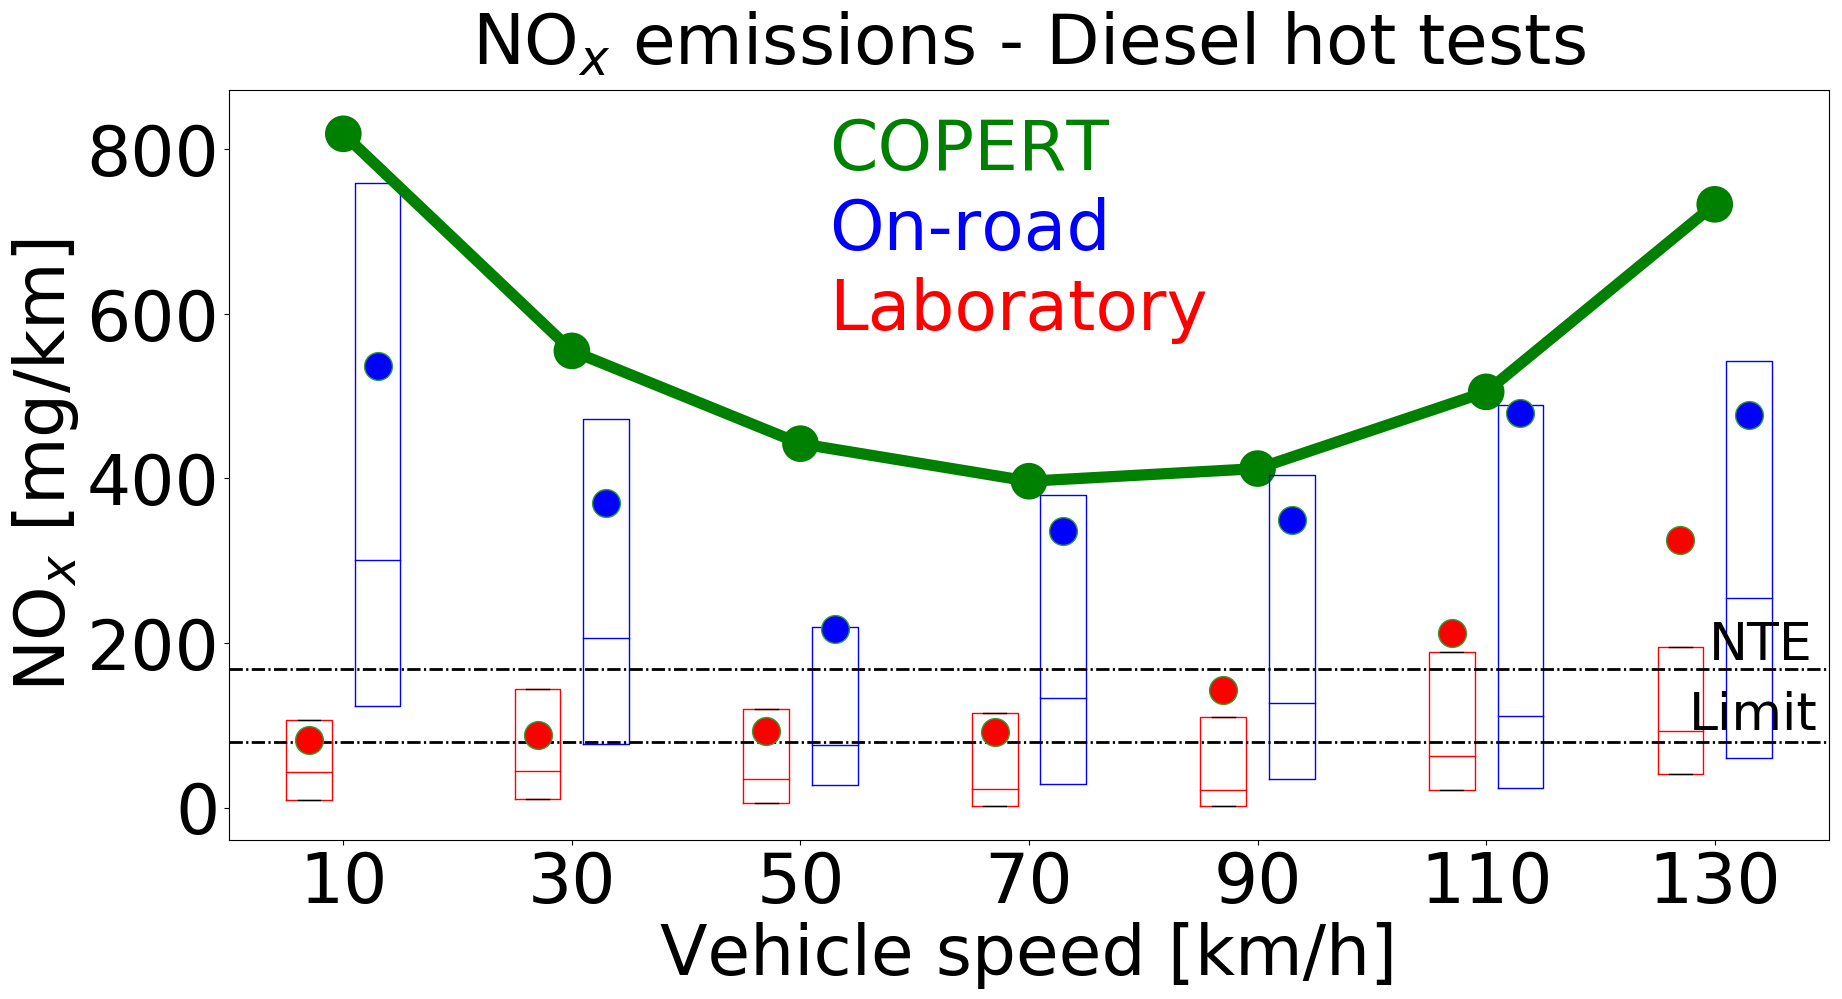

In [24]:
#Select fuel
fuel_type = 'Diesel'  # Diesel or Gasoline
#Select segment
segment = 'Medium'       # Mini; Small; Medium; Large-SUV-Executive; N1-II
# NOx limit
NOx_limd = 80 # for diesel

fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
fontsize = 50
markersize = 20

# LAB
la = LABS_dnox_d.boxplot(by='Speed range', return_type='dict',
                                showmeans = True, grid = False, widths = 0.2, 
               positions = np.arange(14*10/speed_bin)-0.15, showfliers = False, whis = [25,75], #showcaps = False, #whis = [25,75], 
               meanprops=(dict(marker='o',markerfacecolor='red', markersize=markersize)),
               ax=ax0)
[ [item.set_color('r') for item in la[key]['boxes']] for key in la.keys() ]
[ [item.set_color('r') for item in la[key]['medians']] for key in la.keys() ]

# ROAD
tr = TRIPS_dnox_d.boxplot(by='Speed range', return_type='dict',
                                showmeans = True, grid = False, widths = 0.2, 
               positions = np.arange(14*10/speed_bin)+0.15, showfliers = False, whis = [25,75], showcaps = False,
               meanprops=(dict(marker='o',markerfacecolor='blue', markersize=markersize)),
                ax=ax0)
[ [item.set_color('blue') for item in tr[key]['boxes']] for key in tr.keys() ]
[ [item.set_color('blue') for item in tr[key]['medians']] for key in tr.keys() ]

plt.ylabel('NO$_x$ [mg/km]', fontsize = fontsize)
plt.xlabel('Vehicle speed [km/h]', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
#plt.ylim(-10,500)
plt.suptitle('NO$_x$ emissions - Diesel hot tests', fontsize = fontsize)
#plt.grid(True)
import seaborn as sns
if segment == 'N1-II':
    sns.pointplot(x= COPERT_x, y= COPERT_CO2H_DLCV_y, color ='green')
    plt.title('Diesel Euro 6 light commercial vehicle - HOT emissions', fontsize = fontsize)
elif fuel_type == 'Diesel':
    sns.pointplot(x= COPERT_x, y= EF_2016_d*1000, color ='green',scale=3)
#     sns.pointplot(x= COPERT_x, y= EF_2017_d*1000, color ='orange')
#     sns.pointplot(x= COPERT_x, y= EF_COP4_6_d*1000, color ='purple', scale=3)
#     sns.pointplot(x= COPERT_x, y= EF_COP4_6c_d*1000, color ='gray')
#         plt.title('Diesel Euro 6 diesel Large/SUV/Executive vehicle - HOT emissions', fontsize = fontsize)
plt.title("")#('Euro 6 diesel vehicle - HOT emissions', fontsize = fontsize)
plt.axhline(y=NOx_limd, color='k', linestyle='-.', linewidth=2 )
plt.axhline(y=NOx_limd*2.1, color='k', linestyle='-.', linewidth=2 )

plt.figtext(0.4, 0.82, 'COPERT', fontsize = fontsize, color = 'green')           # Euro 6 b,c
# plt.figtext(0.52, 0.82, 'COPERT 5 (Euro 6 d_temp)', fontsize = 22, color = 'orange')
#plt.figtext(0.4, 0.74, 'COPERT pre-dieselgate', fontsize = fontsize, color = 'purple')           # Euro 6  
# plt.figtext(0.52, 0.74, 'COPERT 4 - Euro 6c', fontsize = 22, color = 'gray')
#plt.figtext(0.451, 0.7, 'Fig 3 Leon (approx.)', fontsize = 22, color = [0.6, 0, 0.82, 0.6])
plt.figtext(0.4, 0.74, 'On-road', fontsize = fontsize, color = 'blue')
plt.figtext(0.4, 0.66, 'Laboratory', fontsize = fontsize, color = 'red')
plt.figtext(0.84, 0.33, 'NTE', fontsize = fontsize*0.75, color = 'black')
plt.figtext(0.83, 0.26, 'Limit', fontsize = fontsize*0.75, color = 'black')

plt.show()
mpl.rcdefaults()

#### Cold vs hot (NEDC & WLTP together)

In [25]:
#Parse from each VELA2 modal file: vehicle speed and instantaneous vehicle emission (g/s)
LABS = pd.DataFrame()
os.chdir(die_nox_coldhot)

dic_cold = {}
for file in glob.glob("*COLD*.xl*"):                                                          # THIS CAN BE XLS OR XLSX, check
    print(file)
    df = pd.read_excel(file, sheetname = 'Data', header = 0, parse_cols = "A:BC")
    df = df.dropna(axis=0, how='all')
    
    NOx = df['c_NOx_Dil_g_vec\n[grams]']
    NOx_sum = NOx.sum()*1000
    t = len(df.index)
#     v = df['DACtrl_ActualSpeed\n[kph]']            #group speed by intervals
#     t_s = len(df.index)                                                #  time(s)
#     t_h = t_s/3600                                                                    # time (hours)
#     v_mean = v.mean()                                                  # speed means
#     d = v_mean * t_h #b.reset_index(drop=True) * d.reset_index(drop=True)                # distance means
    
#     NOxkm = NOx_sum/d                                                    # NOx / km
    
    NOx_start = df['c_NOx_Dil_g_vec\n[grams]'][0:300]
    NOx_start_sum = NOx_start.sum()*1000
    t_start = 300
    
    NOx_end = df['c_NOx_Dil_g_vec\n[grams]'][300:len(df.index)]
    NOx_end_sum = NOx_end.sum()*1000
    t_end = t - t_start
    
#     v = df['DACtrl_ActualSpeed\n[kph]'][0:300]               #  group speed by intervals
#     t_s = 300                                                #  time(s)
#     t_h = t_s/3600                                                                    # time (hours)
#     v_mean = v.mean()                                                  # speed means
#     d = v_mean * t_h #b.reset_index(drop=True) * d.reset_index(drop=True)                # distance means
    
#     NOxkm_start = NOx_sum/d
    
    dic_cold[file] = [NOx_sum,t,NOx_start_sum,t_start,NOx_end_sum,t_end]                                         # save means in the dictionary
    

lab = pd.DataFrame()                                     # convert dic to dataframe
lab = lab.from_dict(dic_cold, orient='index')             # proper order
lab.columns = ['NOx','t','NOx_start','t_start','NOx_end','t_end']               # headers
lab_cold_d = lab

VELA2_01072016_003_Modal_TP_NEDC_COLD_FWD_23C.xls


D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


VELA2_01122017_001_Modal_TP_WLTC_COLD_FWD-sync_23°C.xlsx
VELA2_02052017_001_Modal_DIL_NEDC_COLD_FWD-sync_23°C.xlsx
VELA2_03102017_001_Modal_NEDC_COLD_RWD-sync_23°C.xlsx
VELA2_04082017_001_Modal_WLTC_COLD_4WD_23°C.xlsx
VELA2_05042017_002_Modal_DIL_NEDC_COLD START_4WD_23°C.xls
VELA2_05052017_001_Modal_DIL_WLTP_COLD_FWD-sync_23°C.xlsx
VELA2_05072016_001_Modal_NEDC_COLD_FWD_23C.xls
VELA2_05072016_004_Modal_WLTP_COLD_FW_23C.xls
VELA2_05102017_001_Modal_WLTC_COLD_RWD-sync_23°C.xlsx
VELA2_06042017_003_Modal_DIL_NEDC_COLD START_4WD_23°C.xls
VELA2_06072016_001_Modal_WLTP_COLD_FWD_23C.xls
VELA2_06072017_002_Modal_DIL_WLTP_COLD START_4WD_23°C.xls
VELA2_06102017_001_Modal_WLTC_COLD_RWD-sync_23°C.xlsx
VELA2_06122017_001_Modal_WLTC_COLD_FWD-sync_23°C.xlsx
VELA2_07072017_001_Modal_DIL_WLTP_COLD START_4WD_23°C.xls
VELA2_09102017_001_Modal_NEDC_COLD_RWD-sync_23°C.xlsx
VELA2_10082017_001_Modal_NEDC_COLD_4WD_23°C.xlsx
VELA2_11082017_001_Modal_NEDC_COLD_FWD-sync_23°C.xls
VELA2_14072016_001_Modal_WLTP_COLD

In [26]:
lab_cold_d.t_start.mean()*100/lab_cold_d.t.mean()

20.278389745643903

In [27]:
lab_cold_d.NOx_start.mean()*100/lab_cold_d.NOx.mean()  # percentage representing first 5 minutes of tests (NOx emissions)

11.168391042198206

In [28]:
#Parse from each VELA2 modal file: vehicle speed and instantaneous vehicle emission (g/s)
LABS = pd.DataFrame()
os.chdir(die_nox_coldhot)

dic_hot = {}
for file in glob.glob("*HOT*.xl*"):                                                          # THIS CAN BE XLS OR XLSX, check
    print(file)
    df = pd.read_excel(file, sheetname = 'Data', header = 0, parse_cols = "A:BC")
    df = df.dropna(axis=0, how='all')
    
    NOx = df['c_NOx_Dil_g_vec\n[grams]']
    NOx_sum = NOx.sum()*1000
    t = len(df.index)
#     v = df['DACtrl_ActualSpeed\n[kph]']            #group speed by intervals
#     t_s = len(df.index)                                                #  time(s)
#     t_h = t_s/3600                                                                    # time (hours)
#     v_mean = v.mean()                                                  # speed means
#     d = v_mean * t_h #b.reset_index(drop=True) * d.reset_index(drop=True)                # distance means
    
#     NOxkm = NOx_sum/d                                                    # NOx / km
    
    NOx_start = df['c_NOx_Dil_g_vec\n[grams]'][0:300]
    NOx_start_sum = NOx_start.sum()*1000
    t_start = 300
    
    NOx_end = df['c_NOx_Dil_g_vec\n[grams]'][300:len(df.index)]
    NOx_end_sum = NOx_end.sum()*1000
    t_end = t - t_start
    
#     v = df['DACtrl_ActualSpeed\n[kph]'][0:300]               #  group speed by intervals
#     t_s = 300                                                #  time(s)
#     t_h = t_s/3600                                                                    # time (hours)
#     v_mean = v.mean()                                                  # speed means
#     d = v_mean * t_h #b.reset_index(drop=True) * d.reset_index(drop=True)                # distance means
    
#     NOxkm_start = NOx_sum/d
    
    dic_hot[file] = [NOx_sum,t,NOx_start_sum,t_start,NOx_end_sum,t_end]            # save means in the dictionary
    

lab = pd.DataFrame()                                     # convert dic to dataframe
lab = lab.from_dict(dic_hot, orient='index')             # proper order
lab.columns = ['NOx','t','NOx_start','t_start','NOx_end','t_end']               # headers
lab_hot_d = lab

VELA2_01072016_002_Modal_TP_NEDC_HOT_FWD_23C.xls


D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


VELA2_01072016_004_Modal_TP_WLTP_HOT_FWD_23C.xls
VELA2_01122017_002_Modal_TP_WLTC_HOT_FWD-sync_23°C.xlsx
VELA2_01122017_006_Modal_TP_WLTC_HOT_FWD-sync_23°C.xlsx
VELA2_02052017_002_Modal_DIL_NEDC_HOT_FWD-sync_23°C.xlsx
VELA2_03052017_002_Modal_DIL_WLTP_HOT_FWD-sync_23°C.xlsx
VELA2_03082017_002_Modal_WLTC_HOT_4WD_23°C.xlsx
VELA2_03102017_002_Modal_NEDC_HOT_RWD-sync_23°C.xlsx
VELA2_04082017_002_Modal_WLTC_HOT_4WD_23°C.xlsx
VELA2_05042017_003_Modal_DIL_NEDC_HOT START_4WD_23°C.xls
VELA2_05052017_002_Modal_DIL_WLTP_HOT_FWD-sync_23°C.xlsx
VELA2_05072016_002_Modal_NEDC_HOT_FWD_23C.xls
VELA2_05072016_005_Modal_WLTP_HOT_FW_23C.xls
VELA2_06042017_002_Modal_DIL_NEDC_HOT START_4WD_23°C.xls
VELA2_06072016_003_Modal_WLTP_HOT_FWD_23C.xls
VELA2_06072017_003_Modal_DIL_WLTP_HOT START_4WD_23°C.xls
VELA2_06102017_002_Modal_WLTC_HOT_RWD-sync_23°C.xlsx
VELA2_06122017_002_Modal_WLTC_HOT_FWD-sync_23°C.xlsx
VELA2_07072017_002_Modal_DIL_WLTP_HOT START_4WD_23°C.xls
VELA2_09082017_002_Modal_NEDC_HOT_4WD_23°C.xlsx


### Graphical abstract

D:\Apps\co2mpas_AIO-1.7.3\Apps\WinPython\python-3.6.1.amd64\lib\site-packages\seaborn\categorical.py:1443: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


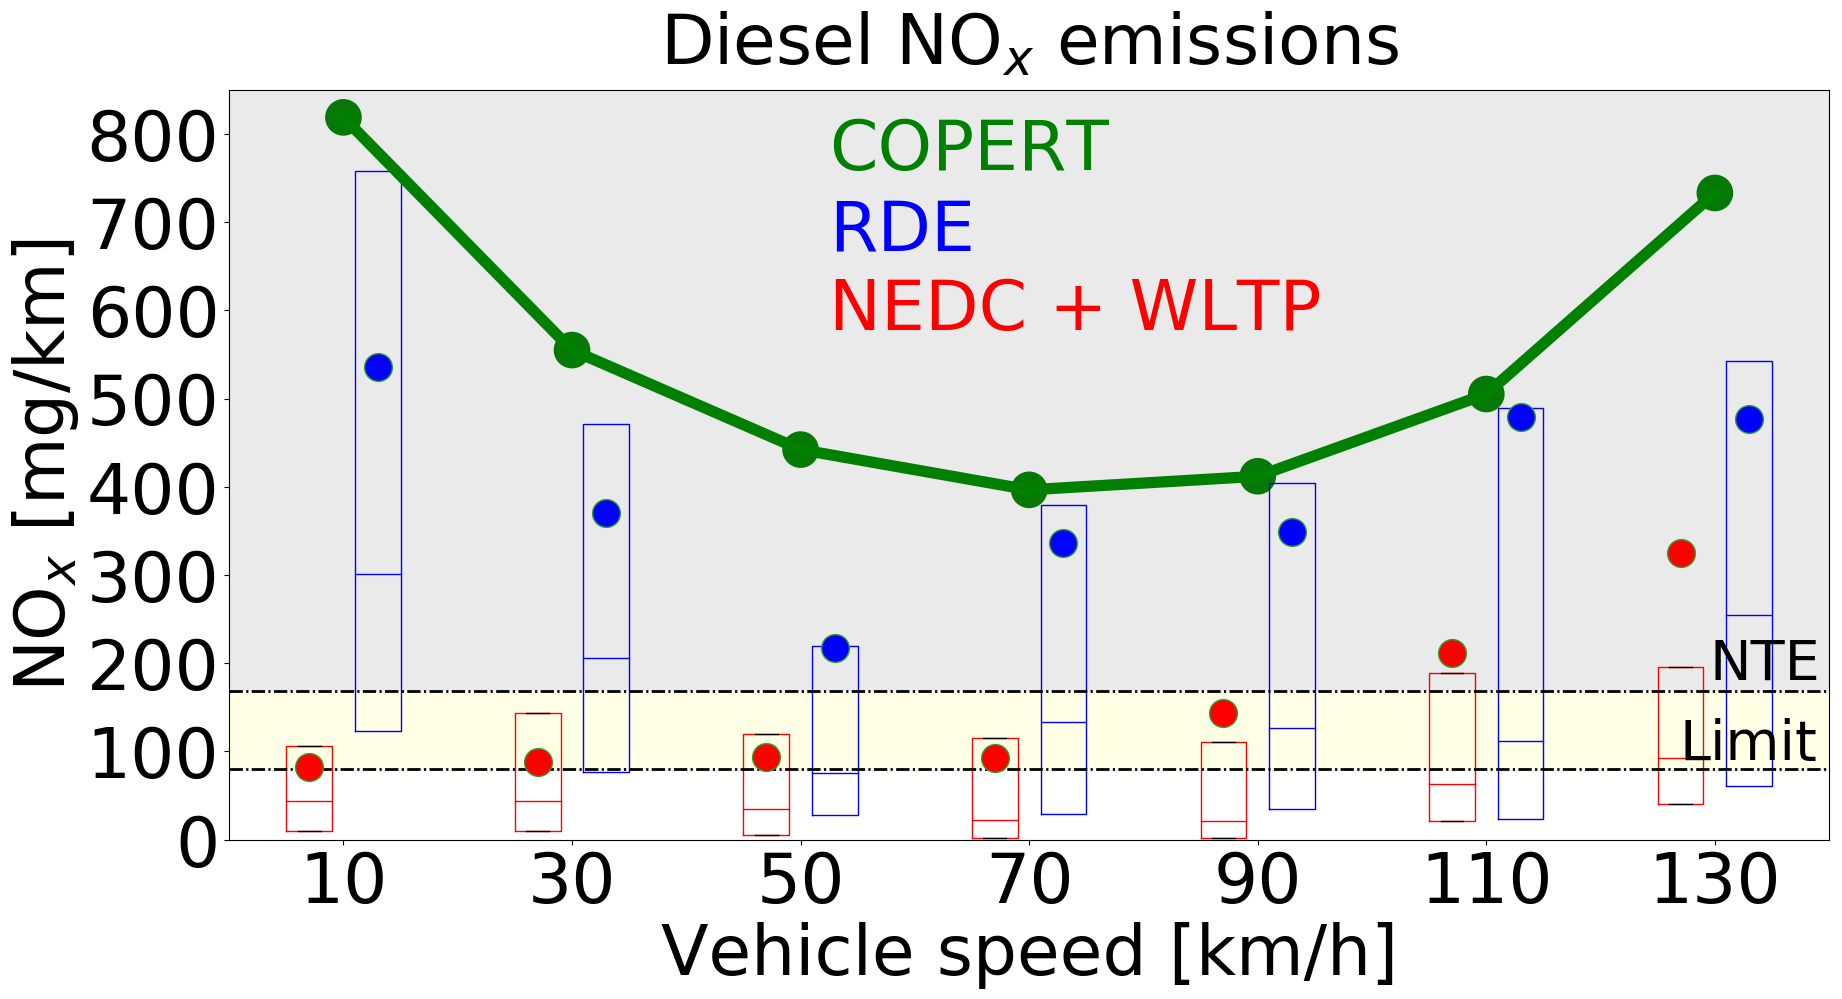

In [67]:
#Select fuel
fuel_type = 'Diesel'  # Diesel or Gasoline
#Select segment
segment = 'Medium'       # Mini; Small; Medium; Large-SUV-Executive; N1-II
# NOx limit
NOx_limd = 80 # for diesel

fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
fontsize = 50
markersize = 20

# LAB
la = LABS_dnox_d.boxplot(by='Speed range', return_type='dict',
                                showmeans = True, grid = False, widths = 0.2, 
               positions = np.arange(14*10/speed_bin)-0.15, showfliers = False, whis = [25,75], #showcaps = False, #whis = [25,75], 
               meanprops=(dict(marker='o',markerfacecolor='red', markersize=markersize)),
               ax=ax0)
[ [item.set_color('r') for item in la[key]['boxes']] for key in la.keys() ]
[ [item.set_color('r') for item in la[key]['medians']] for key in la.keys() ]

# ROAD
tr = TRIPS_dnox_d.boxplot(by='Speed range', return_type='dict',
                                showmeans = True, grid = False, widths = 0.2, 
               positions = np.arange(14*10/speed_bin)+0.15, showfliers = False, whis = [25,75], showcaps = False,
               meanprops=(dict(marker='o',markerfacecolor='blue', markersize=markersize)),
                ax=ax0)
[ [item.set_color('blue') for item in tr[key]['boxes']] for key in tr.keys() ]
[ [item.set_color('blue') for item in tr[key]['medians']] for key in tr.keys() ]

plt.ylabel('NO$_x$ [mg/km]', fontsize = fontsize)
plt.xlabel('Vehicle speed [km/h]', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylim(0,850)
plt.suptitle('Diesel NO$_x$ emissions', fontsize = fontsize)
#plt.grid(True)
import seaborn as sns
if segment == 'N1-II':
    sns.pointplot(x= COPERT_x, y= COPERT_CO2H_DLCV_y, color ='green')
    plt.title('Diesel Euro 6 light commercial vehicle - HOT emissions', fontsize = fontsize)
elif fuel_type == 'Diesel':
    sns.pointplot(x= COPERT_x, y= EF_2016_d*1000, color ='green',scale=3)
#     sns.pointplot(x= COPERT_x, y= EF_2017_d*1000, color ='orange')
#     sns.pointplot(x= COPERT_x, y= EF_COP4_6_d*1000, color ='purple', scale=3)
#     sns.pointplot(x= COPERT_x, y= EF_COP4_6c_d*1000, color ='gray')
#         plt.title('Diesel Euro 6 diesel Large/SUV/Executive vehicle - HOT emissions', fontsize = fontsize)
plt.title("")#('Euro 6 diesel vehicle - HOT emissions', fontsize = fontsize)
plt.axhline(y=NOx_limd, color='k', linestyle='-.', linewidth=2 )
plt.axhline(y=NOx_limd*2.1, color='k', linestyle='-.', linewidth=2 )

plt.figtext(0.4, 0.82, 'COPERT', fontsize = fontsize, color = 'green')           # Euro 6 b,c
# plt.figtext(0.52, 0.82, 'COPERT 5 (Euro 6 d_temp)', fontsize = 22, color = 'orange')
#plt.figtext(0.4, 0.74, 'COPERT pre-dieselgate', fontsize = fontsize, color = 'purple')           # Euro 6  
# plt.figtext(0.52, 0.74, 'COPERT 4 - Euro 6c', fontsize = 22, color = 'gray')
#plt.figtext(0.451, 0.7, 'Fig 3 Leon (approx.)', fontsize = 22, color = [0.6, 0, 0.82, 0.6])
plt.figtext(0.4, 0.74, 'RDE', fontsize = fontsize, color = 'blue')
plt.figtext(0.4, 0.66, 'NEDC + WLTP', fontsize = fontsize, color = 'red')
plt.figtext(0.84, 0.31, 'NTE', fontsize = fontsize*0.8, color = 'black')
plt.figtext(0.825, 0.23, 'Limit', fontsize = fontsize*0.8, color = 'black')

plt.axhspan(NOx_limd, NOx_limd*2.1, facecolor='yellow', alpha=0.1)
plt.axhspan(NOx_limd*2.1, 850, facecolor='0.2', alpha=0.1)

plt.show()
mpl.rcdefaults()

In [65]:
pd.set_option('display.max_rows',1100)
LABSdn_distbin['NOx [mg/km]']

Distance categories
(0.0, 0.5]          36.947351
(0.5, 1.0]          69.442822
(1.0, 1.5]          87.613003
(1.5, 2.0]          64.552512
(2.0, 2.5]          81.491187
(2.5, 3.0]          56.019404
(3.0, 3.5]          60.786569
(3.5, 4.0]          43.069275
(4.0, 4.5]          39.187873
(4.5, 5.0]         142.767099
(5.0, 5.5]          34.675337
(5.5, 6.0]          17.258459
(6.0, 6.5]           5.005976
(6.5, 7.0]          22.948381
(7.0, 7.5]          19.615590
(7.5, 8.0]          27.856086
(8.0, 8.5]         110.517823
(8.5, 9.0]         128.588017
(9.0, 9.5]          52.933089
(9.5, 10.0]         33.947312
(10.0, 10.5]        14.462081
(10.5, 11.0]         3.693959
(11.0, 11.5]        18.510182
(11.5, 12.0]       106.967849
(12.0, 12.5]        60.313287
(12.5, 13.0]        16.548436
(13.0, 13.5]         4.571092
(13.5, 14.0]         2.157249
(14.0, 14.5]        43.761525
(14.5, 15.0]         9.162056
(15.0, 15.5]         1.783864
(15.5, 16.0]        22.141118
(16.0, 16.5]        

In [60]:
LABSdn_distbin.describe()

,index,Time [s],Vehicle speed [km/h],CO2 [g/s],NOx [g/s],"STOP, 0 = YES",Inst. speed when vehicle moves,Inst. Mass NOx when vehicle moves,Distance when vehicle moves,NOx [mg/km],Inst. Mass CO2 when vehicle moves,CO2 [g/km],Cumulative distance
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,1064.173442,1064.330422,67.082204,2.828747,0.003240,0.932722,67.076962,0.003237,0.018632,135.597786,2.815189,144.987701,279.998295
std,464.421664,464.183617,36.174874,2.274637,0.008995,0.146441,36.182095,0.008996,0.010051,281.049856,2.286926,56.654212,161.729409
min,52.500000,53.330774,8.656395,0.182161,0.000000,0.402062,8.616667,0.000000,0.002394,0.000000,0.041905,8.594465,0.218723
25%,772.000000,771.927042,35.905103,1.121808,0.000105,1.000000,35.905103,0.000105,0.009974,7.685530,1.097800,107.432944,140.161865
50%,1090.750000,1090.682508,67.611713,1.984187,0.000618,1.000000,67.611713,0.000606,0.018781,44.015180,1.984187,140.341266,280.009882
75%,1480.500000,1480.413173,96.933580,3.772562,0.002277,1.000000,96.933580,0.002277,0.026926,134.948699,3.772562,178.479830,419.883068
max,1774.500000,1774.492889,129.739409,11.946601,0.082619,1.000000,129.739409,0.082619,0.036039,2498.794373,11.946601,380.589574,559.665161
